In [45]:
# train a generative adversarial network on a one-dimensional function
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from matplotlib import pyplot
import requests
import json

from bs4 import BeautifulSoup


In [46]:
#deck to vector conversion updated for the new json dictionnary
#New: Testing

file = open("data.json", "r")

cards = json.load(file)

#removes hero classes from json
def remove_impurities(cards):
    i = 0
    j = 0
    fixed = 0
    to_del = []
    for card in cards:
        if 'cost' in card:
            i+=1
        else:
            to_del.append(card)
            print('Removed:', card['name'])
            j +=1
        if card['playerClass'] == 'Neutral' and 'classes' in card:
            card['playerClass'] = card['classes'][0]
            fixed += 1
            print('Fixed playerClass of ', card['name'], ' from Neutral to ', card['classes'][0])
    for elem in to_del:
        cards.remove(elem)
    print('Number of impurities removed: ', j, '/', i+j)
    print('Number of card impurities fixed: ', fixed)
    return cards

def sortby_alphabetical_cost(cards):
    sorted_list = sorted(cards, key=lambda i: (i['cost'],i['name']))
    return reset_index(sorted_list)

def reset_index(cards):
    i=0
    for card in cards:
        card['id'] = i
        i+=1
    return cards

cards = remove_impurities(cards)
cards = sortby_alphabetical_cost(cards)

deck_vector = [32,64,98,1000,1250,1,2,4,5,70,97,12,67,98,33,33,43,54,76,27,65,43,78,32,78,96,12,10,32,6]
deck_vector_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

def deck_to_vector(deck_cards):
    vect = []
    for elem in deck_cards:
        #print(elem['id'])
        vect.append(elem['id'])
        #print(elem)
        #print(elem in cards)
        #vect.append(cards[elem['id']]['id'])
    return vect
    
def vector_to_deck(deck_vector,cards=cards):
    deck = []
    for elem in deck_vector:
        deck.append(cards[elem])
    return deck


deck = vector_to_deck(deck_vector)
deck_vector = deck_to_vector(deck)

print(deck[0])
#print(deck_vector)
#res = vector_to_deck(deck_vector_2)
#print(res)
#print(deck_to_vector(res))



Fixed playerClass of  Guidance  from Neutral to  Druid
Fixed playerClass of  Nitroboost Poison  from Neutral to  Rogue
Fixed playerClass of  Resizing Pouch  from Neutral to  Druid
Fixed playerClass of  Felfire Deadeye  from Neutral to  Hunter
Fixed playerClass of  Imprisoned Phoenix  from Neutral to  Mage
Fixed playerClass of  Hysteria  from Neutral to  Priest
Fixed playerClass of  Luckysoul Hoarder  from Neutral to  Warlock
Fixed playerClass of  Barricade  from Neutral to  Paladin
Fixed playerClass of  Rally!  from Neutral to  Paladin
Fixed playerClass of  Keywarden Ivory  from Neutral to  Mage
Removed: Anduin Wrynn
Removed: Garrosh Hellscream
Removed: Gul'dan
Removed: Illidan Stormrage
Removed: Jaina Proudmoore
Removed: Malfurion Stormrage
Removed: Rexxar
Removed: Thrall
Removed: Uther Lightbringer
Removed: Valeera Sanguinar
Number of impurities removed:  10 / 1299
Number of card impurities fixed:  10
{'cardId': 'EX1_277', 'dbfId': '564', 'name': 'Arcane Missiles', 'cardSet': 'Basic'

In [3]:
#file1 = open('cards-standard.txt', 'r') 
#Lines = file1.readlines() 
#maximum = len(Lines)
#cards_key = {}
#cards_value = {}
#i=1
#for line in Lines:
 #   cards_value[i] = line.rstrip("\n")
  #  cards_key[line.rstrip("\n")] = i
   # i += 1

#print(cards_key["Arcane Breath"])
#print(cards_value[32])
#print(len(Lines))

In [4]:
#deck_vector = [32,64,98,1000,1250,1,2,4,5,70,97,12,67,98,33,33,43,54,76,27,65,43,78,32,78,96,12,10,32,6]
#print(len(deck_vector))

#no need to filter based of card class or legendaries etc.. because this is just for the conversion after the deck has been built. The actual filtering should be either done by the AI or previously done in the deckbuilding CSV

#def deck_to_vector_csv(deck):
 #   deck_vector = []
  #  for elem in deck:
        #remove any potential white spaces from strings
        #if type(deck) is not list:
   #     elem = elem.lstrip()
    #    elem = elem.rstrip()
     #   deck_vector.append(cards_key[elem])
    #return deck_vector

#def vector_to_deck_csv(deck_vector):
 #   deck = []
  #  for elem in deck_vector:
   #     deck.append(cards_value[elem])
    #return deck

#deck = vector_to_deck(deck_vector)
#print(deck)

#new_deck_vector = deck_to_vector(deck)
#print(new_deck_vector)


In [47]:
import numpy as np
import pandas as pd

def concatenate_deck_class(decks, classes):
    concatenated_result = []
    for i in range(len(decks)):
        concatenated_result.append([decks[i],classes[i]])
    return concatenated_result

def read_vector_decks(file):
    df = pd.read_csv(file)
    cards_from_csv = df['cards']
    converted_decks = []
    for cards in cards_from_csv:
        if len(deck) == 30: #len(cards)
            deck_to_convert = []
            cards = cards.strip("[]")
            cards = cards.split(", ")
            for card in cards:
                if card == '':
                    continue
                deck_to_convert.append(int(card)-1)
            converted_decks.append(vector_to_deck(deck_to_convert)) #np.asarray
            class_from_csv = df['class']
            final = concatenate_deck_class(converted_decks, class_from_csv)
    return final
            

deck_list = read_vector_decks("collected_decks_vectored_Warrior.csv")

def read_json_decks(file):
    file = open(file, "r")
    deck_list = json.load(file)
    cleaned_deck_list = []
    for deck in deck_list:
        if len(deck) == 30:
            cleaned_deck_list.append(deck)
    return cleaned_deck_list

deck_list = read_json_decks('data_Warrior.json')


deck_list[0]

[{'cardId': 'BT_121',
  'dbfId': '56508',
  'name': "Imprisoned Gan'arg",
  'cardSet': 'Ashes of Outland',
  'type': 'Minion',
  'rarity': 'Common',
  'cost': 1,
  'attack': 2,
  'health': 2,
  'text': '<b>Dormant</b> for 2 turns.\\nWhen this awakens,\\nequip a 3/2 Axe.',
  'flavor': 'Factory Direct Fiery War Axe. Please allow two turns for delivery.',
  'artist': 'Ivan Fomin',
  'collectible': True,
  'race': 'Demon',
  'playerClass': 'Warrior',
  'img': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/b5d2910686d797f3e762ccb4159599e227d594a9d7e5dad864fee508fb259bb9.png',
  'locale': 'enUS',
  'id': 332},
 {'cardId': 'BT_121',
  'dbfId': '56508',
  'name': "Imprisoned Gan'arg",
  'cardSet': 'Ashes of Outland',
  'type': 'Minion',
  'rarity': 'Common',
  'cost': 1,
  'attack': 2,
  'health': 2,
  'text': '<b>Dormant</b> for 2 turns.\\nWhen this awakens,\\nequip a 3/2 Axe.',
  'flavor': 'Factory Direct Fiery War Axe. Please allow two turns for delivery.',
  'artist': 'Ivan Fomin',
  '

In [11]:
new_deck_list = []
for deck in deck_list:
   # print(deck[0])
    new_deck = []
    for card in deck[0]:
        #print(deck[0])
        new_deck.append(cards[card['id']])
    new_deck_list.append(new_deck)
new_deck_list[0]
        

[{'cardId': 'EX1_607',
  'dbfId': '22',
  'name': 'Inner Rage',
  'cardSet': 'Classic',
  'type': 'Spell',
  'faction': 'Neutral',
  'rarity': 'Common',
  'cost': 0,
  'text': 'Deal $1 damage to a minion and give it +2_Attack.',
  'flavor': "They're only smiling on the outside.",
  'artist': 'Slawomir Maniak',
  'collectible': True,
  'playerClass': 'Warrior',
  'img': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/4efd90fc75721bfe5a8c09b743a0bb44aa6a42dbc3b22c35f0fe89047b26deb2.png',
  'imgGold': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/abb68da5ff2f70f84ecaa827ff05501beb5b472cb4de476175619552c2d5a987.png',
  'locale': 'enUS',
  'id': 8},
 {'cardId': 'EX1_607',
  'dbfId': '22',
  'name': 'Inner Rage',
  'cardSet': 'Classic',
  'type': 'Spell',
  'faction': 'Neutral',
  'rarity': 'Common',
  'cost': 0,
  'text': 'Deal $1 damage to a minion and give it +2_Attack.',
  'flavor': "They're only smiling on the outside.",
  'artist': 'Slawomir Maniak',
  'collectible': True,
  'p

In [48]:
#this became redundant after I scraped class decks separately

classes = ['Warrior', 'Mage', 'Hunter', 'Priest', 'Druid', 'Rogue', 'Shaman', 'Warlock', 'Paladin', 'Demon Hunter']

class_dictionary = {}

def filter_class(class_):
    filtered_decks = []
    for deck in deck_list:
        if len(deck[0]) == 30:
            if deck[1] == class_:
                filtered_decks.append(deck)
    return filtered_decks

for class_ in classes:
    class_dictionary[class_] = filter_class(class_)
    #print(filtered_decks)        

Warrior: 0
Mage: 0
Hunter: 0
Priest: 0
Druid: 0
Rogue: 0
Shaman: 0
Warlock: 0
Paladin: 0
Demon Hunter: 0


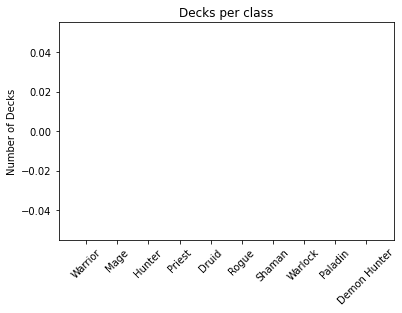

In [49]:
import numpy as np
import matplotlib.pyplot as plt

performance = []
#number of decks of each class
for class_ in classes:
    performance.append(len(class_dictionary[class_]))
    print(class_ + ": " + str(len(class_dictionary[class_])))


y_pos = np.arange(len(classes))
plt.bar(y_pos, performance, align="center", alpha=0.5)
plt.xticks(y_pos, classes, rotation = 45)
plt.ylabel('Number of Decks')
plt.title('Decks per class')
plt.show()

In [50]:
#try to get the weights from the generator and use those in random.choices()
#New: testing
import random

def sort_by_class(cl, cards):
    class_cards = []
    for card in cards:
        #check for multiclass cards
        if 'classes' in card and cl in card['classes']:
            #print(card['name'])
            for class_ in card['classes']:
                class_cards.append(card)
        else: 
            if card['playerClass'] == cl: #or card['playerClass'] == 'Neutral' if I want to add Neutrals
                class_cards.append(card)
    return class_cards

#I use 2 separate decks to increase the chances that a class card is picked otherwise there would be an imbalanced dataset
def generate_fake_deck(class_cards, neutral_cards):
    deck = []
    for i in range(30):
        x = random.randint(1,2)
        #print(x)
        if(x % 2 == 0):
            deck.append(random.choice(class_cards))
        else:
            deck.append(random.choice(neutral_cards))
    return deck_to_vector(deck)

class_cards = sort_by_class('Hunter', cards)
neutral_cards = sort_by_class('Neutral', cards)

fake_deck = generate_fake_deck(class_cards,neutral_cards) 

#print([x['name'] for x in fake_deck])
vec = [x for x in fake_deck]
print(vec)
d_vec = vector_to_deck(vec)
print([x['name'] for x in d_vec])
#print(deck_to_vector(fake_deck))

[200, 192, 746, 40, 511, 239, 715, 155, 997, 1186, 1206, 632, 654, 1255, 1156, 1066, 668, 516, 303, 1277, 1248, 1083, 464, 134, 1117, 302, 709, 1191, 846, 1096]
['Trueaim Crescent', 'Timber Wolf', 'Disguised Wanderer', 'Bestial Wrath', 'Coldlight Seer', 'Bloodmage Thalnos', 'Arcane Fletcher', 'Resizing Pouch', 'Rotnest Drake', 'Wrapped Golem', 'Guardian Animals', 'Nine Lives', 'Saddlemaster', 'Nozdormu', "Kael'thas Sunstrider", 'Gadgetzan Auctioneer', "Shan'do Wildclaw", 'Dalaran Mage', 'Fresh Scent', "N'Zoth, God of the Deep", 'King Krush', 'Maxima Blastenheimer', 'Zephrys the Great', 'Overwhelm', 'Violet Warden', 'Freezing Trap', 'Zixor, Apex Predator', 'Beastmaster Leoroxx', 'Scrap Shot', 'Safeguard']


In [82]:
deck_list[0]

[[{'cardId': 'EX1_607',
   'dbfId': '22',
   'name': 'Inner Rage',
   'cardSet': 'Classic',
   'type': 'Spell',
   'faction': 'Neutral',
   'rarity': 'Common',
   'cost': 0,
   'text': 'Deal $1 damage to a minion and give it +2_Attack.',
   'flavor': "They're only smiling on the outside.",
   'artist': 'Slawomir Maniak',
   'collectible': True,
   'playerClass': 'Warrior',
   'img': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/4efd90fc75721bfe5a8c09b743a0bb44aa6a42dbc3b22c35f0fe89047b26deb2.png',
   'imgGold': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/abb68da5ff2f70f84ecaa827ff05501beb5b472cb4de476175619552c2d5a987.png',
   'locale': 'enUS',
   'id': 0},
  {'cardId': 'EX1_607',
   'dbfId': '22',
   'name': 'Inner Rage',
   'cardSet': 'Classic',
   'type': 'Spell',
   'faction': 'Neutral',
   'rarity': 'Common',
   'cost': 0,
   'text': 'Deal $1 damage to a minion and give it +2_Attack.',
   'flavor': "They're only smiling on the outside.",
   'artist': 'Slawomir Maniak',

In [51]:
import copy

#After adding sorting there have been more instances of more precise decks
#It seems that when the AI initially trains with a better initial start it the sorting results in more accurate decks than without sorting
# however I have also noticed that sometimes it has trouble training
#still inconsistant, need to find a way to make it more consistant - maybe by always testing with the same generated deck?
#when attempting to create a warrior deck it tends to have lots of mage cards

#BE CAREFUL OF PREVIOUS ID'S GETTING MIXED UP

#I need to reidentify cards id otherwise it doesn't make a difference

#BUG WHERE DECKS ARENT ID CORRECTLY

grp_classes = classes + ['Neutral']
print(grp_classes)

def groupby_cost(cards):
    sorted_list = sorted(cards, key=lambda i: i['cost'])
    return sorted_list    

def groupby_class(classes, cards):
    sorted_deck = []
    for class_ in classes:
        class_deck = sort_by_class(class_, cards)
        class_deck = groupby_cost(class_deck)
        sorted_deck.extend(class_deck)
       # print(sorted_deck)
    return sorted_deck

#reID's everything after card limitation
def limit_card_range(cards, new_deck_list, classes):
    new_cards = groupby_class(classes, cards)
   # print(new_cards[0]['id'])
    i=0
    for card in new_cards:
        card['id'] = i
        i+=1
    #new_deck_list = deck_list.copy()
    #print(new_cards[0]['id'])
    for deck in new_deck_list:
        print([x['name'] for x in deck])
        for card in deck:
            print(card['name'], card['id'])
            temp = next((new_card for new_card in new_cards if new_card['name'] == card['name']), None)
            if(temp != None):
                print(temp['name'], temp['id'])
                card['id'] = temp['id']
            #for new_card in new_cards:
                #print(card['name'])
                #print(new_card)
             #   if card['name'] == new_card['name']:
              #      card['id'] = new_card['id']
               #     break
    return new_cards, new_deck_list

new_deck_list = copy.deepcopy(deck_list)
new_cards = copy.deepcopy(cards)

new_cards, new_deck_list = limit_card_range(new_cards, new_deck_list, ['Warrior', 'Neutral'])

print('Card id: ', cards[0]['id'], new_cards[0]['id'])

#print([x['id'] for x in new_deck_list[0]])
print('Deck list: \n', [x['name'] for x in deck_list[0]],'\n', [x['name'] for x in new_deck_list[0]])
print('Deck id: \n', [x['id'] for x in deck_list[0]],'\n',[x['id'] for x in new_deck_list[0]] )
print(len(cards), len(new_cards))
print(cards[10]['name'], new_cards[10]['name'])

['Warrior', 'Mage', 'Hunter', 'Priest', 'Druid', 'Rogue', 'Shaman', 'Warlock', 'Paladin', 'Demon Hunter', 'Neutral']
["Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Nitroboost Poison', 'Nitroboost Poison', 'Sky Raider', 'Sky Raider', 'Upgrade!', 'Upgrade!', 'Ancharrr', 'Frothing Berserker', 'Frothing Berserker', 'Skybarge', 'Skybarge', "Kor'kron Elite", "Kor'kron Elite", 'Sword Eater', 'Sword Eater', 'Cutting Class', 'Cutting Class', 'Doctor Krastinov', 'Ringmaster Whatley', 'Tent Trasher', 'Tent Trasher', 'Southsea Deckhand', 'Southsea Deckhand', 'Parachute Brigand', 'Parachute Brigand', 'Dread Corsair', 'Dread Corsair', 'Captain Greenskin']
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Nitroboost Poison 6
Nitroboost Poison 9
Nitroboost Poison 6
Nitroboost Poison 9
Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Upgrade! 942
Upgrade! 18
Upgrade! 942
Upgrade! 18
Ancharrr 536
Ancharrr 40
Frothing Berserker 1013
Frothing Berserker 55
Frot

Shield Slam 11
Stage Dive 13
Stage Dive 16
Sword and Board 342
Sword and Board 17
Sword and Board 342
Sword and Board 17
Corsair Cache 350
Corsair Cache 25
Minefield 38
Minefield 32
Minefield 38
Minefield 32
Bladestorm 379
Bladestorm 42
Coerce 221
Coerce 51
Coerce 221
Coerce 51
Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Commencement 290
Commencement 97
Commencement 290
Commencement 97
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Troublemaker 300
Troublemaker 103
Troublemaker 300
Troublemaker 103
Rattlegore 303
Rattlegore 104
Dimensional Ripper 901
Dimensional Ripper 105
Dimensional Ripper 901
Dimensional Ripper 105
Archmage Vargoth 833
Archmage Vargoth 296
Scrapyard Colossus 459
Scrapyard Colossus 490
['Inner Rage', 'Nitroboost Poison', 'Nitroboost Poison', 'Sky Raider', 'Sky Raider', 'Corsair Cache'

Bladestorm 42
Coerce 221
Coerce 51
EVIL Quartermaster 547
EVIL Quartermaster 52
Livewire Lance 701
Livewire Lance 57
Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Reaper's Scythe 256
Reaper's Scythe 75
Restless Mummy 720
Restless Mummy 76
Sword Eater 117
Sword Eater 80
Brawl 1079
Brawl 83
Ringmaster Whatley 135
Ringmaster Whatley 89
Scrap Golem 429
Scrap Golem 90
Armagedillo 741
Armagedillo 92
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Tomb Warden 761
Tomb Warden 102
Zephrys the Great 686
Zephrys the Great 224
Circus Amalgam 102
Circus Amalgam 302
Claw Machine 140
Claw Machine 410
Siamat 754
Siamat 450
Carnival Clown 162
Carnival Clown 474
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 475
N'Zoth, God of the Deep 167
N'Zoth, God of the Deep 489
Scrapyard Colossus 459
Scrapyard Colossus 490
['Athletic Studies', 'Athletic Studies', 'Shield Slam', 'Shield Slam', 'Spiked Wheel', 'Spiked Wheel', 'Corsair Cache', 'Cors

Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Commencement 290
Commencement 97
Commencement 290
Commencement 97
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Troublemaker 300
Troublemaker 103
Troublemaker 300
Troublemaker 103
Rattlegore 303
Rattlegore 104
Dimensional Ripper 901
Dimensional Ripper 105
Dimensional Ripper 901
Dimensional Ripper 105
Archmage Vargoth 833
Archmage Vargoth 296
Scrapyard Colossus 459
Scrapyard Colossus 490
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Sky Raider', 'Sky Raider', 'Sword and Board', 'Sword and Board', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Ancharrr', 'Bladestorm', 'Bladestorm', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Lord Barov', 'Shield Block', 'Shield Block', 'Kargath Bladefist', "Reaper's Scythe", "Reaper's Scythe", 'Brawl', 'Brawl', 'Cutting Class', 'Cutting Class', 'Soulbound Ashtongue', 'Silas Darkmoon']
Risky Skipper

Stage Dive 13
Stage Dive 16
Stage Dive 13
Stage Dive 16
Sword and Board 342
Sword and Board 17
Sword and Board 342
Sword and Board 17
Minefield 38
Minefield 32
Minefield 38
Minefield 32
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
Coerce 221
Coerce 51
Coerce 221
Coerce 51
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Sword Eater 117
Sword Eater 80
Sword Eater 117
Sword Eater 80
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Ringmaster Whatley 135
Ringmaster Whatley 89
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Zephrys the Great 686
Zephrys the Great 224
Claw Machine 140
Claw Machine 410
Claw Machine 140
Claw Machine 410
Evasive Wyrm 609
Evasive Wyrm 413
C'Thun, the Shattered 165
C'Thun, the Shattered 483
Yogg-Saron, Master of Fate 169
Yogg-Saron, Master of Fate 493
['Athletic Studies', 'Ath

Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Minefield 38
Minefield 32
Minefield 38
Minefield 32
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
Clockwork Goblin 817
Clockwork Goblin 49
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Wrenchcalibur 853
Wrenchcalibur 81
Wrenchcalibur 853
Wrenchcalibur 81
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Ringmaster Whatley 135
Ringmaster Whatley 89
Blastmaster Boom 879
Blastmaster Boom 94
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Ironbeak Owl 1019
Ironbeak Owl 262
Hoard Pillager 571
Hoard Pillager 327
Hoard Pillager 571
Hoard Pillager 327
['Athletic Studies', 'Athletic Studies', 'Sword and Board

Ancharrr 40
Bladestorm 379
Bladestorm 42
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bulwark of Azzinoth 384
Bulwark of Azzinoth 46
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Sword Eater 117
Sword Eater 80
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Rattlegore 303
Rattlegore 104
Soulbound Ashtongue 340
Soulbound Ashtongue 140
Ironbeak Owl 1019
Ironbeak Owl 262
Kobold Stickyfinger 593
Kobold Stickyfinger 378
Silas Darkmoon 152
Silas Darkmoon 451
['Athletic Studies', 'Shield Slam', 'Shield Slam', 'Armorsmith', 'Armorsmith', 'Frightened Flunky', 'Frightened Flunky', 'Minefield', 'Minefield', 'Bladestorm', 'Bladestorm', 'Coerce', 'Coerce', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Shield Block', 'Shield

Brawl 83
Ringmaster Whatley 135
Ringmaster Whatley 89
Scrap Golem 429
Scrap Golem 90
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Troublemaker 300
Troublemaker 103
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Zephrys the Great 686
Zephrys the Great 224
Cobalt Spellkin 588
Cobalt Spellkin 363
Harrison Jones 1088
Harrison Jones 376
Siamat 754
Siamat 450
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 475
C'Thun, the Shattered 165
C'Thun, the Shattered 483
N'Zoth, God of the Deep 167
N'Zoth, God of the Deep 489
['Shield Slam', 'Shield Slam', 'Sky Raider', 'Sky Raider', 'Sword and Board', 'Sword and Board', 'E.T.C., God of Metal', 'Execute', 'Frightened Flunky', 'Frightened Flunky', 'In Formation!', 'Minefield', 'Vicious Scraphound', 'Vicious Scraphound', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Coerce', 'Coerce', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Livewire Lance', 'Livewire Lance', 'Lord Barov', 'Shield Block', 'Sword Eater', 'Sword Eater', 'Brawl', 'Animated 

Darkmoon Dirigible 61
Darkmoon Dirigible 236
Darkmoon Dirigible 61
Darkmoon Dirigible 236
Fishy Flyer 248
Fishy Flyer 319
Fishy Flyer 248
Fishy Flyer 319
Hoard Pillager 571
Hoard Pillager 327
Hoard Pillager 571
Hoard Pillager 327
Captain Greenskin 1080
Captain Greenskin 361
Claw Machine 140
Claw Machine 410
Evasive Wyrm 609
Evasive Wyrm 413
Siamat 754
Siamat 450
N'Zoth, God of the Deep 167
N'Zoth, God of the Deep 489
['Into the Fray', 'Frightened Flunky', 'In Formation!', "Ringmaster's Baton", 'Awaken!', 'Playmaker', 'Kargath Bladefist', 'Restless Mummy', 'Scion of Ruin', 'Doctor Krastinov', 'Ringmaster Whatley', 'Tent Trasher', 'Armagedillo', 'Galakrond, the Unbreakable', 'Tomb Warden', 'Zephrys the Great', 'Infested Goblin', 'Circus Amalgam', 'Devoted Maniac', 'Fishy Flyer', 'Hoard Pillager', 'Shield of Galakrond', 'Evasive Wyrm', 'Gyrocopter', 'Kronx Dragonhoof', 'Siamat', 'Carnival Clown', 'Dragonqueen Alexstrasza', "N'Zoth, God of the Deep", 'Scrapyard Colossus']
Into the Fray 643

Doctor Krastinov 266
Doctor Krastinov 87
Ringmaster Whatley 135
Ringmaster Whatley 89
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Rattlegore 303
Rattlegore 104
Zephrys the Great 686
Zephrys the Great 224
Hecklebot 837
Hecklebot 324
Cobalt Spellkin 588
Cobalt Spellkin 363
Kobold Stickyfinger 593
Kobold Stickyfinger 378
Claw Machine 140
Claw Machine 410
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 475
C'Thun, the Shattered 165
C'Thun, the Shattered 483
Yogg-Saron, Master of Fate 169
Yogg-Saron, Master of Fate 493
['Risky Skipper', 'Shield Slam', 'Stage Dive', 'Sword and Board', 'Armorsmith', 'Battle Rage', 'Corsair Cache', 'Minefield', 'Slam', 'Ancharrr', 'Bladestorm', 'Coerce', 'EVIL Quartermaster', 'Livewire Lance', 'Lord Barov', 'Shield Block', 'Kargath Bladefist', 'Sword Eater', 'Brawl', 'Cutting Class', 'Ringmaster Whatley', 'Scrap Golem', 'Deathwing, Mad Aspect', 'Zephrys the Great', 'Circus Amalgam', 'Siamat', 'Dragonqueen Alexstrasza', "C'Thun, the Shattered", "N'Z

EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Sword Eater 117
Sword Eater 80
Sword Eater 117
Sword Eater 80
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Soulbound Ashtongue 340
Soulbound Ashtongue 140
Silas Darkmoon 152
Silas Darkmoon 451
['Sky Raider', 'Sky Raider', 'Corsair Cache', "Ringmaster's Baton", "Ringmaster's Baton", 'Stage Hand', 'Stage Hand', 'Ancharrr', 'Skybarge', 'Skybarge', 'Sword Eater', 'Sword Eater', 'Ringmaster Whatley', 'Tent Trasher', 'Tent Trasher', 'Bloodsail Corsair', 'Bloodsail Corsair', 'Hot Air Balloon', 'Hot Air Balloon', 'Southsea Deckhand', 'Southsea Deckhand', 'Parachute Brigand', 'Parachute Brigand', 'Prize Vendor', 'Prize Vendor', 'Darkmoon Dirigible', 'Darkmoon Dirigible',

Shield of Galakrond 598
Shield of Galakrond 390
Khartut Defender 745
Khartut Defender 418
Kronx Dragonhoof 612
Kronx Dragonhoof 419
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 475
['Shield Slam', 'Shield Slam', 'Battle Rage', 'Battle Rage', 'Frightened Flunky', 'Frightened Flunky', 'Minefield', 'Minefield', 'Bladestorm', 'Bladestorm', 'Sword Eater', 'Sword Eater', 'Brawl', 'Brawl', 'Ringmaster Whatley', 'Scrap Golem', 'Scrap Golem', 'Armagedillo', 'Deathwing, Mad Aspect', 'Circus Amalgam', 'Circus Amalgam', 'Khartut Defender', 'Khartut Defender', 'Strongman', 'Strongman', 'Carnival Clown', 'Carnival Clown', "N'Zoth, God of the Deep", 'Scrapyard Colossus', "Y'Shaarj, the Defiler"]
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Frightened Flunky 666
Frightened Flunky 29
Frightened Flunky 666
Frightened Flunky 29
Minefield 38
Minefield 32
Minefield 38
Minefield 32
Bladestorm 379
Bladestorm 42
Bladestorm 3

Blazing Battlemage 498
Blazing Battlemage 115
Southsea Deckhand 940
Southsea Deckhand 141
Southsea Deckhand 940
Southsea Deckhand 141
Bloodsail Raider 954
Bloodsail Raider 156
Bloodsail Raider 954
Bloodsail Raider 156
Parachute Brigand 528
Parachute Brigand 197
Parachute Brigand 528
Parachute Brigand 197
Southsea Captain 1036
Southsea Captain 284
Southsea Captain 1036
Southsea Captain 284
Voracious Reader 241
Voracious Reader 291
Voracious Reader 241
Voracious Reader 291
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
Hoard Pillager 571
Hoard Pillager 327
Hoard Pillager 571
Hoard Pillager 327
Lorekeeper Polkelt 270
Lorekeeper Polkelt 380
['Shield Slam', 'Sword and Board', 'Whirlwind', 'Corsair Cache', 'Bladestorm', 'Coerce', 'EVIL Quartermaster', 'Livewire Lance', 'Lord Barov', 'Shield Block', 'Kargath Bladefist', "Reaper's Scythe", 'Sword Eater', 'Brawl', 'Cutting Class', 'Ringmaster Whatley', 'Scrap Golem', 'Armagedillo', 'Galakrond, the Unbreakable', 'Death

Sword and Board 17
Sword and Board 342
Sword and Board 17
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Frightened Flunky 666
Frightened Flunky 29
Frightened Flunky 666
Frightened Flunky 29
Minefield 38
Minefield 32
Minefield 38
Minefield 32
Ringmaster's Baton 44
Ringmaster's Baton 34
Ringmaster's Baton 44
Ringmaster's Baton 34
Ancharrr 536
Ancharrr 40
Coerce 221
Coerce 51
Coerce 221
Coerce 51
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Sword Eater 117
Sword Eater 80
Sword Eater 117
Sword Eater 80
Ringmaster Whatley 135
Ringmaster Whatley 89
Scrap Golem 429
Scrap Golem 90
Scrap Golem 429
Scrap Golem 90
Tent Trasher 136
Tent Trasher 91
Tent Trasher 136
Tent Trasher 91
Armagedillo 741
Armagedillo 92
Hungry Crab 925
Hungry Crab 124
Circus Amalgam 102
Circus Amalgam 302
Circus Amalgam 102
Circus Amalgam 302
N'Zoth, God of the

Faceless Corruptor 592
Faceless Corruptor 368
Faceless Corruptor 592
Faceless Corruptor 368
Shield of Galakrond 598
Shield of Galakrond 390
Shield of Galakrond 598
Shield of Galakrond 390
Claw Machine 140
Claw Machine 410
Claw Machine 140
Claw Machine 410
Kronx Dragonhoof 612
Kronx Dragonhoof 419
['Athletic Studies', 'Athletic Studies', 'Stage Dive', 'Stage Dive', 'Bumper Car', 'Bumper Car', 'E.T.C., God of Metal', 'Minefield', 'Minefield', "Ringmaster's Baton", "Ringmaster's Baton", 'Lord Barov', 'Playmaker', 'Playmaker', 'Kargath Bladefist', 'Sword Eater', 'Sword Eater', 'Doctor Krastinov', 'Ringmaster Whatley', 'Tent Trasher', 'Tent Trasher', 'Parade Leader', 'Parade Leader', 'Circus Amalgam', 'Circus Amalgam', 'Fishy Flyer', 'Fishy Flyer', 'Claw Machine', 'Claw Machine', "N'Zoth, God of the Deep"]
Athletic Studies 176
Athletic Studies 1
Athletic Studies 176
Athletic Studies 1
Stage Dive 13
Stage Dive 16
Stage Dive 13
Stage Dive 16
Bumper Car 17
Bumper Car 22
Bumper Car 17
Bumper Ca

Steeldancer 260
Steeldancer 79
Wrenchcalibur 853
Wrenchcalibur 81
Wrenchcalibur 853
Wrenchcalibur 81
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Doctor Krastinov 266
Doctor Krastinov 87
Blastmaster Boom 879
Blastmaster Boom 94
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Hoard Pillager 571
Hoard Pillager 327
Hoard Pillager 571
Hoard Pillager 327
Captain Greenskin 1080
Captain Greenskin 361
Kronx Dragonhoof 612
Kronx Dragonhoof 419
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Ancharrr', 'Bladestorm', 'Bladestorm', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Coerce', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Livewire Lance', 'Lord Barov', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Brawl', 'Brawl', 'Galakrond, the Unbreakable', 'D

Shield of Galakrond 390
Kronx Dragonhoof 612
Kronx Dragonhoof 419
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Sword and Board', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Ancharrr', 'Bladestorm', 'Bladestorm', 'Bloodsworn Mercenary', 'Coerce', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Brawl', 'Brawl', 'Bloodboil Brute', 'Bloodboil Brute', 'Deathwing, Mad Aspect', 'Soulbound Ashtongue', 'Doomsayer', 'Zephrys the Great', 'Kobold Stickyfinger', 'Silas Darkmoon']
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sword and Board 342
Sword and Board 17
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Ancharrr 536
Ancharrr 40
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Coerc

Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Ritual Chopper 530
Ritual Chopper 35
Ritual Chopper 530
Ritual Chopper 35
Awaken! 537
Awaken! 41
Awaken! 537
Awaken! 41
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Scion of Ruin 575
Scion of Ruin 77
Scion of Ruin 575
Scion of Ruin 77
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Dragon Breeder 522
Dragon Breeder 167
Dragon Breeder 522
Dragon Breeder 167
Devoted Maniac 562
Devoted Maniac 309
Devoted Maniac 562
Devoted Maniac 309
Barista Lynchen 855
Barista Lynchen 356
Shield of Galakrond 598
Shield of Galakrond 390
Shield of Galakrond 598
Shield of Galakrond 390
Kronx Dragonhoof 612
Kronx Dragonhoof 419
['Athletic Studies', 'Athletic Studies', 'Hack the System', 'Swo

Sathrovarr 633
Sathrovarr 480
['Athletic Studies', 'Risky Skipper', 'Shield Slam', 'Sword and Board', 'Armorsmith', 'Corsair Cache', 'Frightened Flunky', 'Ritual Chopper', 'Awaken!', 'Bladestorm', 'Bomb Wrangler', 'Bulwark of Azzinoth', 'Coerce', 'EVIL Quartermaster', 'Livewire Lance', 'Lord Barov', 'Ramming Speed', 'Shield Block', 'Kargath Bladefist', "Reaper's Scythe", 'Restless Mummy', 'Brawl', 'Galakrond, the Unbreakable', 'Deathwing, Mad Aspect', 'Troublemaker', 'Zephrys the Great', 'Devoted Maniac', 'Shield of Galakrond', 'Kronx Dragonhoof', 'Dragonqueen Alexstrasza']
Athletic Studies 176
Athletic Studies 1
Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 11
Sword and Board 342
Sword and Board 17
Armorsmith 950
Armorsmith 20
Corsair Cache 350
Corsair Cache 25
Frightened Flunky 666
Frightened Flunky 29
Ritual Chopper 530
Ritual Chopper 35
Awaken! 537
Awaken! 41
Bladestorm 379
Bladestorm 42
Bomb Wrangler 475
Bomb Wrangler 44
Bulwark of Azzinoth 384
Bulwark of Azzinoth

Imprisoned Gan'arg 5
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Upgrade! 942
Upgrade! 18
Upgrade! 942
Upgrade! 18
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Skybarge 558
Skybarge 63
Skybarge 558
Skybarge 63
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Reaper's Scythe 256
Reaper's Scythe 75
Reaper's Scythe 256
Reaper's Scythe 75
Steeldancer 260
Steeldancer 79
Arcanite Reaper 1269
Arcanite Reaper 82
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Southsea Deckhand 940
Southsea Deckhand 141
Southsea Deckhand 940
Southsea Deckhand 141
Bloodsail Raider 954
Bloodsail Raider 156
Bloodsail Raider 954
Bloodsail Raider 156
Parachute Brigand 528
Parachute Brigand 197
Parachute Brigand 528
Parachute Brigand 197
Southsea Captain 1036
Southsea Captain 284
Southsea Captain 1036
Southsea Captain 284
Voracious Reader 241
Voracious Reader 291
Voracious Reader 241
Vor

Reaper's Scythe 75
Reaper's Scythe 256
Reaper's Scythe 75
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Troublemaker 300
Troublemaker 103
Troublemaker 300
Troublemaker 103
Pen Flinger 192
Pen Flinger 134
Pen Flinger 192
Pen Flinger 134
Cult Neophyte 206
Cult Neophyte 163
Cult Neophyte 206
Cult Neophyte 163
Cobalt Spellkin 588
Cobalt Spellkin 363
Cobalt Spellkin 588
Cobalt Spellkin 363
Evasive Wyrm 609
Evasive Wyrm 413
Evasive Wyrm 609
Evasive Wyrm 413
Onyx Magescribe 286
Onyx Magescribe 422
Onyx Magescribe 286
Onyx Magescribe 422
["Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Sky Raider', 'Sky Raider', 'Upgrade!', 'Upgrade!', 'Heroic Strike', 'Heroic Strike', 'Skybarge', 'Skybarge', "Kor'kron Elite", "Kor'kron Elite", 'Mortal Strike', 'Mortal Strike', "Reaper's Scythe", "Reaper's Scythe", 'Arcanite Reaper', 'Arcanite Reaper', 'Cutting Class', 'Cutting Class', 'Southsea Deckhand', 'Southsea Deckhand', 'Bloodsail Raider', 'Bl

Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sword and Board 342
Sword and Board 17
Sword and Board 342
Sword and Board 17
Execute 1199
Execute 28
Execute 1199
Execute 28
Slam 987
Slam 36
Slam 987
Slam 36
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
Coerce 221
Coerce 51
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Reaper's Scythe 256
Reaper's Scythe 75
Reaper's Scythe 256
Reaper's Scythe 75
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Plague of Wrath 738
Plague of Wrath 88
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Grommash Hellscream 1129
Grommash Hellscream 101
Pen Flinger 192
Pen Flinger 134
Pen Flinger 192
Pen Flinger 134
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Ironbeak Owl 1019
Ironbeak Owl 262
Headmaster Kel'Thuzad 

Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Ancharrr 536
Ancharrr 40
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
Lord Barov 229
Lord Barov 59
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Wrenchcalibur 853
Wrenchcalibur 81
Wrenchcalibur 853
Wrenchcalibur 81
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Cutting Class 265
Cutting Class 85
Cutting Class 265
Cutting Class 85
Doctor Krastinov 266
Doctor Krastinov 87
Blastmaster Boom 879
Blastmaster Boom 94
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Hoard Pillager 571
Hoard Pillager 327
Hoard Pillager 571
Hoard Pillager 327
Captain Greenskin 1080
Captain Greenskin 361
['Risky Skipper', 'Risky Skipper', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Rampage', 'Rampage', 'Bladestorm', 'Bladestorm', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', 'Lord Barov', 'Shield Block', 'Shield Block', 'Restless Mum

Cutting Class 85
Cutting Class 265
Cutting Class 85
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Troublemaker 300
Troublemaker 103
Troublemaker 300
Troublemaker 103
Magtheridon 409
Magtheridon 329
Headmaster Kel'Thuzad 267
Headmaster Kel'Thuzad 377
Kronx Dragonhoof 612
Kronx Dragonhoof 419
['Athletic Studies', 'Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Bladestorm', 'Bladestorm', 'Bulwark of Azzinoth', 'Coerce', 'Coerce', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Lord Barov', 'Ramming Speed', 'Shield Block', 'Shield Block', 'Kargath Bladefist', "Reaper's Scythe", "Reaper's Scythe", 'Restless Mummy', 'Restless Mummy', 'Brawl', 'Brawl', 'Deathwing, Mad Aspect', 'Troublemaker', 'Troublemaker', 'Rattlegore', 'Magtheridon', "Headmaster Kel'Thuzad", 'Siamat']
Athletic Studies 176
Athletic Studies 1
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sword and Board 342
Sword and Board 17

Athletic Studies 176
Athletic Studies 1
Athletic Studies 176
Athletic Studies 1
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Shield of Honor 195
Shield of Honor 13
Shield of Honor 195
Shield of Honor 13
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Ritual Chopper 530
Ritual Chopper 35
Ritual Chopper 530
Ritual Chopper 35
Ancharrr 536
Ancharrr 40
Awaken! 537
Awaken! 41
Awaken! 537
Awaken! 41
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
Coerce 221
Coerce 51
Coerce 221
Coerce 51
Lord Barov 229
Lord Barov 59
Warmaul Challenger 400
Warmaul Challenger 64
Scion of Ruin 575
Scion of Ruin 77
Scion of Ruin 575
Scion of Ruin 77
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Devoted Maniac 562
Devoted Maniac 309
Devoted Maniac 562
Devoted Maniac 309
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
Shield of Galakrond 598
Shield of Galakrond 390
Shield of Galak

Commencement 97
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Troublemaker 300
Troublemaker 103
Troublemaker 300
Troublemaker 103
Rattlegore 303
Rattlegore 104
Dimensional Ripper 901
Dimensional Ripper 105
Dimensional Ripper 901
Dimensional Ripper 105
The Boom Reaver 905
The Boom Reaver 106
Archmage Vargoth 833
Archmage Vargoth 296
Big Bad Archmage 900
Big Bad Archmage 482
Big Bad Archmage 900
Big Bad Archmage 482
['Athletic Studies', 'Athletic Studies', 'Risky Skipper', 'Risky Skipper', 'Armorsmith', 'Armorsmith', 'Corsair Cache', 'Corsair Cache', 'Bomb Wrangler', 'Bomb Wrangler', 'Clockwork Goblin', 'Clockwork Goblin', 'Coerce', 'Coerce', 'Lord Barov', 'Playmaker', 'Playmaker', 'Warmaul Challenger', 'Warmaul Challenger', 'Kargath Bladefist', "Reaper's Scythe", 'Wrenchcalibur', 'Wrenchcalibur', 'Cutting Class', 'Doctor Krastinov', 'Blastmaster Boom', 'Bloodboil Brute', 'Troublemaker', 'Troublemaker', 'Hoard Pillager']
Athletic Studies 176
Athletic Studies 1
Athletic Studies 176


Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Rampage 985
Rampage 33
Rampage 985
Rampage 33
Slam 987
Slam 36
Slam 987
Slam 36
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
Coerce 221
Coerce 51
Coerce 221
Coerce 51
Frothing Berserker 1013
Frothing Berserker 55
Frothing Berserker 1013
Frothing Berserker 55
Lord Barov 229
Lord Barov 59
Troublemaker 300
Troublemaker 103
Pen Flinger 192
Pen Flinger 134
Pen Flinger 192
Pen Flinger 134
Wandmaker 217
Wandmaker 218
Wandmaker 217
Wandmaker 218
['Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Bladestorm', 'Bladestorm', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Lord Barov', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Restless Mummy', 'Restless Mummy', 'Wrenchcalibur', 'Wrenc

Hoard Pillager 327
Hoard Pillager 571
Hoard Pillager 327
Captain Greenskin 1080
Captain Greenskin 361
['Inner Rage', 'Inner Rage', 'Athletic Studies', 'Athletic Studies', 'Shield Slam', 'Shield Slam', 'Corsair Cache', 'Corsair Cache', 'Bladestorm', 'Bladestorm', 'Shield Block', 'Shield Block', 'Kargath Bladefist', "Reaper's Scythe", "Reaper's Scythe", 'Brawl', 'Brawl', 'Cutting Class', 'Cutting Class', 'Commencement', 'Commencement', 'Troublemaker', 'Troublemaker', 'Rattlegore', 'Dimensional Ripper', 'Dimensional Ripper', "Kael'thas Sunstrider", 'Colossus of the Moon', 'Scrapyard Colossus', 'Scrapyard Colossus']
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Athletic Studies 176
Athletic Studies 1
Athletic Studies 176
Athletic Studies 1
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Bladestorm 379
Bladestorm 42
Bladestorm 379
Bladestorm 42
Shield Block 1239
Shield Block 62
Shield Block 1239
Sh

Plague of Wrath 88
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Grommash Hellscream 1129
Grommash Hellscream 101
Troublemaker 300
Troublemaker 103
Troublemaker 300
Troublemaker 103
Rattlegore 303
Rattlegore 104
Dimensional Ripper 901
Dimensional Ripper 105
Dimensional Ripper 901
Dimensional Ripper 105
The Boom Reaver 905
The Boom Reaver 106
Plagued Protodrake 298
Plagued Protodrake 466
Plagued Protodrake 298
Plagued Protodrake 466
['Athletic Studies', 'Athletic Studies', 'Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Corsair Cache', 'Corsair Cache', 'Bladestorm', 'Bladestorm', 'Bulwark of Azzinoth', 'Ramming Speed', 'Ramming Speed', 'Shield Block', 'Shield Block', 'Kargath Bladefist', "Reaper's Scythe", "Reaper's Scythe", 'Brawl', 'Brawl', 'Commencement', 'Commencement', 'Deathwing, Mad Aspect', 'Troublemaker', 'Troublemaker', 'Rattlegore', 'Dimensional Ripper', 'Dimensional Ripper', 'The Boom Reaver', 'Archmage Vargoth']
Athletic Studies 176
Athletic Studi

Reaper's Scythe 75
Magtheridon 409
Magtheridon 329
Headmaster Kel'Thuzad 267
Headmaster Kel'Thuzad 377
Vectus 279
Vectus 400
['Risky Skipper', 'Risky Skipper', 'Shield of Honor', 'Shield of Honor', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Execute', 'Execute', 'Rampage', 'Rampage', 'Bladestorm', 'Bladestorm', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bonechewer Raider', 'Bonechewer Raider', 'Coerce', 'Coerce', 'Frothing Berserker', 'Frothing Berserker', 'Playmaker', 'Playmaker', 'Kargath Bladefist', 'Restless Mummy', 'Restless Mummy', 'Bloodboil Brute', 'Bloodboil Brute', 'Rocket Augmerchant']
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Shield of Honor 195
Shield of Honor 13
Shield of Honor 195
Shield of Honor 13
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Execute 1199
Execute 28
Execute 1199
Execute 28
Rampage 985
Rampage 33
Rampage 985
Rampage 33
Bladestorm 37

Grommash Hellscream 1129
Grommash Hellscream 101
Troublemaker 300
Troublemaker 103
Troublemaker 300
Troublemaker 103
Rattlegore 303
Rattlegore 104
Dimensional Ripper 901
Dimensional Ripper 105
The Boom Reaver 905
The Boom Reaver 106
Archmage Vargoth 833
Archmage Vargoth 296
Blatant Decoy 743
Blatant Decoy 406
Blatant Decoy 743
Blatant Decoy 406
Plagued Protodrake 298
Plagued Protodrake 466
Plagued Protodrake 298
Plagued Protodrake 466
Scrapyard Colossus 459
Scrapyard Colossus 490
Scrapyard Colossus 459
Scrapyard Colossus 490
['Risky Skipper', 'Shield Slam', 'Sword and Board', 'Armorsmith', 'Battle Rage', 'Corsair Cache', 'Execute', 'Frightened Flunky', 'Ancharrr', 'Bladestorm', 'Coerce', 'EVIL Quartermaster', 'Livewire Lance', 'Lord Barov', 'Shield Block', 'Kargath Bladefist', 'Omega Devastator', "Reaper's Scythe", 'Restless Mummy', 'Brawl', 'Bloodboil Brute', 'Deathwing, Mad Aspect', 'Troublemaker', 'Acidic Swamp Ooze', 'Zephrys the Great', 'Bone Wraith', 'Captain Greenskin', "Headmas

Blastmaster Boom 879
Blastmaster Boom 94
Hoard Pillager 571
Hoard Pillager 327
Hoard Pillager 571
Hoard Pillager 327
Captain Greenskin 1080
Captain Greenskin 361
['Athletic Studies', 'Athletic Studies', 'Shield Slam', 'Shield Slam', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Execute', 'Execute', 'Bladestorm', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bulwark of Azzinoth', 'Coerce', 'Coerce', 'Lord Barov', 'Playmaker', 'Playmaker', 'Kargath Bladefist', "Reaper's Scythe", "Reaper's Scythe", 'Brawl', 'Cutting Class', 'Doctor Krastinov', 'Troublemaker', 'Rattlegore', 'Educated Elekk', 'Educated Elekk', "Headmaster Kel'Thuzad"]
Athletic Studies 176
Athletic Studies 1
Athletic Studies 176
Athletic Studies 1
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Execute 1199
Execute 28
Execute 1199
Execute 28
Bladestorm 379
Bladestorm 42
Bloodsw

Commencement 97
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Troublemaker 300
Troublemaker 103
Troublemaker 300
Troublemaker 103
Rattlegore 303
Rattlegore 104
Dimensional Ripper 901
Dimensional Ripper 105
Dimensional Ripper 901
Dimensional Ripper 105
The Boom Reaver 905
The Boom Reaver 106
Burly Shovelfist 898
Burly Shovelfist 473
Burly Shovelfist 898
Burly Shovelfist 473
Scrapyard Colossus 459
Scrapyard Colossus 490
Scrapyard Colossus 459
Scrapyard Colossus 490
['Athletic Studies', 'Athletic Studies', 'Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Corsair Cache', 'Corsair Cache', 'Coerce', 'Coerce', 'Shield Block', 'Shield Block', 'Kargath Bladefist', "Reaper's Scythe", "Reaper's Scythe", 'Brawl', 'Brawl', 'Cutting Class', 'Cutting Class', 'Commencement', 'Commencement', 'Deathwing, Mad Aspect', 'Troublemaker', 'Troublemaker', 'Rattlegore', 'Dimensional Ripper', 'Dimensional Ripper', 'Burly Shovelfist', 'Scrapyard Colossus', 'Scrapyard Colossus']
Athletic 

Rattlegore 104
Dimensional Ripper 901
Dimensional Ripper 105
Dimensional Ripper 901
Dimensional Ripper 105
Archmage Vargoth 833
Archmage Vargoth 296
Scrapyard Colossus 459
Scrapyard Colossus 490
Scrapyard Colossus 459
Scrapyard Colossus 490
['Athletic Studies', 'Athletic Studies', 'Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Sky Raider', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Ancharrr', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Coerce', 'Playmaker', 'Playmaker', 'Shield Block', 'Shield Block', 'Kargath Bladefist', "Reaper's Scythe", 'Brawl', 'Brawl', 'Sphere of Sapience', 'Magtheridon', "Headmaster Kel'Thuzad", 'Vectus']
Athletic Studies 176
Athletic Studies 1
Athletic Studies 176
Athletic Studies 1
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Armors

['Inner Rage', 'Risky Skipper', 'Risky Skipper', 'Sky Raider', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Ritual Chopper', 'Ritual Chopper', 'Ancharrr', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', 'Warmaul Challenger', 'Warmaul Challenger', 'Kargath Bladefist', "Kor'kron Elite", 'Scion of Ruin', 'Scion of Ruin', 'Galakrond, the Unbreakable', 'Devoted Maniac', 'Devoted Maniac', 'Shield of Galakrond', 'Shield of Galakrond', 'Kronx Dragonhoof']
Inner Rage 907
Inner Rage 0
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Ritual Chopper 530
Ritual Chopper 35
Ritual Chopper 530
Ritual Chopper 35
Ancharrr 536
Ancharrr 40
Bloodsw

Dragonmaw Sky Stalker 432
Dragonmaw Sky Stalker 411
Dragonmaw Sky Stalker 432
Dragonmaw Sky Stalker 411
Evasive Wyrm 609
Evasive Wyrm 413
Evasive Wyrm 609
Evasive Wyrm 413
Utgarde Grapplesniper 614
Utgarde Grapplesniper 434
Utgarde Grapplesniper 614
Utgarde Grapplesniper 434
Evasive Drakonid 617
Evasive Drakonid 443
Evasive Drakonid 617
Evasive Drakonid 443
Twin Tyrant 630
Twin Tyrant 468
Twin Tyrant 630
Twin Tyrant 468
Alexstrasza 1135
Alexstrasza 470
Ysera 1142
Ysera 481
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Sky Raider', 'Sky Raider', 'Sword and Board', 'Sword and Board', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Ancharrr', 'Bladestorm', 'Bladestorm', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Blastmaster Boom', 'Bloodboil Brute', 'Bloodboil Brute', 'Galakrond, the Unbreakable', 'Deathwing, Mad Aspect', 'Grommash Hellscream', 'Kronx Dragonhoof', 'Alexstrasza']
R

Omega Devastator 74
Arcanite Reaper 1269
Arcanite Reaper 82
Brawl 1079
Brawl 83
Scrap Golem 429
Scrap Golem 90
Armored Goon 742
Armored Goon 93
Zephrys the Great 686
Zephrys the Great 224
Hoard Pillager 571
Hoard Pillager 327
Sky Gen'ral Kragg 483
Sky Gen'ral Kragg 341
Big Ol' Whelp 585
Big Ol' Whelp 358
Captain Greenskin 1080
Captain Greenskin 361
Faceless Corruptor 592
Faceless Corruptor 368
Harrison Jones 1088
Harrison Jones 376
Khartut Defender 745
Khartut Defender 418
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 475
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Sky Raider', 'Sky Raider', 'Sword and Board', 'Sword and Board', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Ancharrr', 'Bladestorm', 'Bladestorm', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Shield Block', 'Shield Block', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Blastmaster Boom', 'Bloodboil Brute', 'Bloodboil Brute', 'Deathwing, Mad Aspect', '

Bloodboil Brute 441
Bloodboil Brute 95
Serpent Egg 679
Serpent Egg 206
Serpent Egg 679
Serpent Egg 206
Teron Gorefiend 396
Teron Gorefiend 287
['Hack the System', 'Shield Slam', 'Shield Slam', 'Upgrade!', 'Whirlwind', 'Corsair Cache', 'Corsair Cache', 'Slam', 'Clockwork Goblin', 'Clockwork Goblin', 'EVIL Quartermaster', 'EVIL Quartermaster', 'Livewire Lance', 'Livewire Lance', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Wrenchcalibur', 'Wrenchcalibur', 'Brawl', 'Brawl', 'Scrap Golem', 'Scrap Golem', 'Armored Goon', 'Blastmaster Boom', 'Grand Lackey Erkh', 'Hoard Pillager', 'Hoard Pillager', "Sky Gen'ral Kragg", 'Captain Greenskin']
Hack the System 642
Hack the System 4
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Upgrade! 942
Upgrade! 18
Whirlwind 1192
Whirlwind 19
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Slam 987
Slam 36
Clockwork Goblin 817
Clockwork Goblin 49
Clockwork Goblin 817
Clockwork Goblin 49
EVIL Quartermaster 547
EVIL 

Bloodsail Raider 954
Bloodsail Raider 156
Parachute Brigand 528
Parachute Brigand 197
Parachute Brigand 528
Parachute Brigand 197
Southsea Captain 1036
Southsea Captain 284
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
Maiev Shadowsong 410
Maiev Shadowsong 330
Captain Greenskin 1080
Captain Greenskin 361
['Risky Skipper', 'Risky Skipper', 'Shield Slam', 'Shield Slam', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Ancharrr', 'Bladestorm', 'Bladestorm', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Livewire Lance', 'Livewire Lance', 'Shield Block', 'Shield Block', 'Warmaul Challenger', 'Kargath Bladefist', 'Restless Mummy', 'Brawl', 'Brawl', 'Deathwing, Mad Aspect', 'Zephrys the Great', 'Magtheridon', 'Kobold Stickyfinger', 'Archivist Elysiana', 'Dragonqueen Alexstrasza']
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Armorsmit

Sky Raider 14
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Ritual Chopper 530
Ritual Chopper 35
Ritual Chopper 530
Ritual Chopper 35
Ancharrr 536
Ancharrr 40
Awaken! 537
Awaken! 41
Awaken! 537
Awaken! 41
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Warmaul Challenger 400
Warmaul Challenger 64
Warmaul Challenger 400
Warmaul Challenger 64
Kor'kron Elite 1256
Kor'kron Elite 71
Scion of Ruin 575
Scion of Ruin 77
Scion of Ruin 575
Scion of Ruin 77
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Guardian Augmerchant 330
Guardian Augmerchant 122
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Devoted Maniac 562
Devoted Maniac 309
Devoted Maniac 562
Devoted Maniac 309
Shield of Galakrond 598
Shield of Galakrond 390
Shield of Galakrond 598
Shield of Galakrond 390
Kronx Dragonhoof 

Risky Skipper 463
Risky Skipper 10
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Ritual Chopper 530
Ritual Chopper 35
Ritual Chopper 530
Ritual Chopper 35
Ancharrr 536
Ancharrr 40
Awaken! 537
Awaken! 41
Awaken! 537
Awaken! 41
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
Warmaul Challenger 400
Warmaul Challenger 64
Warmaul Challenger 400
Warmaul Challenger 64
Kargath Bladefist 407
Kargath Bladefist 70
Kor'kron Elite 1256
Kor'kron Elite 71
Scion of Ruin 575
Scion of Ruin 77
Scion of Ruin 575
Scion of Ruin 77
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Devoted Maniac 562
Devoted Maniac 309
Devoted Maniac 562
Devoted Maniac 309
Shield of Galakrond 598
Shield of Galakrond 390
Shield of Galakrond 598
Shield of Galakrond 390
Kronx Dragonhoof 612
Kr

Risky Skipper 463
Risky Skipper 10
Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Rampage 985
Rampage 33
Rampage 985
Rampage 33
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Warmaul Challenger 400
Warmaul Challenger 64
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Grommash Hellscream 1129
Grommash Hellscream 101
Injured Tol'vir 669
Injured Tol'vir 178
Injured Tol'vir 669
Injured Tol'vir 178
Grand Lackey Erkh 482
Grand Lackey Erkh 323
Hoard Pillager 571
Hoard Pillager 327
['Risky Skipper', 'Risky Sk

Brawl 83
Brawl 1079
Brawl 83
Bloodboil Brute 441
Bloodboil Brute 95
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Dimensional Ripper 901
Dimensional Ripper 105
Dimensional Ripper 901
Dimensional Ripper 105
The Boom Reaver 905
The Boom Reaver 106
Archmage Vargoth 833
Archmage Vargoth 296
Tentacled Menace 601
Tentacled Menace 399
Tentacled Menace 601
Tentacled Menace 399
Blatant Decoy 743
Blatant Decoy 406
Blatant Decoy 743
Blatant Decoy 406
Colossus of the Moon 766
Colossus of the Moon 484
Scrapyard Colossus 459
Scrapyard Colossus 490
Scrapyard Colossus 459
Scrapyard Colossus 490
['Inner Rage', 'Inner Rage', 'Risky Skipper', 'Risky Skipper', 'Sky Raider', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Rampage', 'Rampage', 'Ancharrr', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', 'Warmaul Challenger', 'Warmaul Challenger', 'Kargath Bladefist', "Kor'kron Elite", 'Wrenchcalibur', 'Wrenchca

Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Warmaul Challenger 400
Warmaul Challenger 64
Warmaul Challenger 400
Warmaul Challenger 64
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Serpent Egg 679
Serpent Egg 206
Serpent Egg 679
Serpent Egg 206
Teron Gorefiend 396
Teron Gorefiend 287
['Inner Rage', 'Inner Rage', 'Risky Skipper', 'Risky Skipper', 'Sky Raider', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Rampage', 'Rampage', 'Ancharrr', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', 'Livewire Lance', 'Livewire Lance', 'Warmaul Challenger', 'Warmaul Challenger', "Kor'kron Elite", "Kor'kron Elite", 'Bloodboil Brute', 'Bloodboil Brute', 'Grommash Hellscream', "Injured Tol'vir", "Injured Tol'vir"]
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Risky Skipper 463
Risky Ski

Kargath Bladefist 407
Kargath Bladefist 70
Wrenchcalibur 853
Wrenchcalibur 81
Wrenchcalibur 853
Wrenchcalibur 81
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Blastmaster Boom 879
Blastmaster Boom 94
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Dread Corsair 1055
Dread Corsair 314
Hoard Pillager 571
Hoard Pillager 327
Hoard Pillager 571
Hoard Pillager 327
Captain Greenskin 1080
Captain Greenskin 361
['Sky Raider', 'Sky Raider', 'Upgrade!', 'Upgrade!', 'Corsair Cache', 'Corsair Cache', 'Heroic Strike', 'Heroic Strike', 'Ancharrr', 'Livewire Lance', 'Livewire Lance', 'Skybarge', 'Skybarge', "Kor'kron Elite", "Kor'kron Elite", 'Southsea Deckhand', 'Southsea Deckhand', 'Bloodsail Raider', 'Bloodsail Raider', 'Loot Hoarder', 'Loot Hoarder', 'Parachute Brigand', 'Parachute Brigand', 'Southsea Captain', 'Southsea Captain', 'Dread Corsair', 'Dread Corsair', 'Hoard Pillager', 'Maiev Shadowsong', 'Captain Greenskin']


Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Commanding Shout 956
Commanding Shout 24
Corsair Cache 350
Corsair Cache 25
Rampage 985
Rampage 33
Rampage 985
Rampage 33
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bomb Wrangler 475
Bomb Wrangler 44
Clockwork Goblin 817
Clockwork Goblin 49
Livewire Lance 701
Livewire Lance 57
Kargath Bladefist 407
Kargath Bladefist 70
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Wrenchcalibur 853
Wrenchcalibur 81
Wrenchcalibur 853
Wrenchcalibur 81
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Grommash Hellscream 1129
Grommash Hellscream 101
Injured Tol'vir 669
Injured Tol'vir 178
Serpent Egg 679
Serpent Egg 206
Serpent Egg 679
Serpent Egg 206
Teron Gorefiend 396
Teron Gorefiend 287
['Hack the System', 'Risky Skipper', 'Upgrade!', 'Battle Rage', 'Corsair Cache', 

Harrison Jones 376
['Sky Raider', 'Sky Raider', 'Upgrade!', 'Bomb Wrangler', 'Bomb Wrangler', 'Livewire Lance', 'Livewire Lance', 'Skybarge', 'Skybarge', "Kor'kron Elite", "Kor'kron Elite", 'Mortal Strike', 'Mortal Strike', 'Arcanite Reaper', 'Arcanite Reaper', 'Blazing Battlemage', 'Blazing Battlemage', 'Southsea Deckhand', 'Southsea Deckhand', 'Bloodsail Raider', 'Bloodsail Raider', 'Parachute Brigand', 'Parachute Brigand', 'Southsea Captain', 'Southsea Captain', 'Dread Corsair', 'Dread Corsair', 'Hoard Pillager', 'Hoard Pillager', 'Captain Greenskin']
Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Upgrade! 942
Upgrade! 18
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Skybarge 558
Skybarge 63
Skybarge 558
Skybarge 63
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Mortal Strike 1065
Mortal Strike 73
Mortal Strike 1065
Mortal Strike 73
Arcanite Reape

Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
Clockwork Goblin 817
Clockwork Goblin 49
Clockwork Goblin 817
Clockwork Goblin 49
Wrenchcalibur 853
Wrenchcalibur 81
Wrenchcalibur 853
Wrenchcalibur 81
Blastmaster Boom 879
Blastmaster Boom 94
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Injured Tol'vir 669
Injured Tol'vir 178
Injured Tol'vir 669
Injured Tol'vir 178
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
Hoard Pillager 571
Hoard Pillager 327
['Inner Rage', 'Inner Rage', 'Hack the System', 'Risky Skipper', 'Risky Skipper', 'Sky Raider', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Ancharrr', 'Bomb Wrangler', 'Bomb Wrangler', 'Clockwork Goblin', 'Clockwork Goblin', 'Livewire Lance', 'Livewire Lance', 'Kargath Bladefist', "Kor'kron Elite", "Kor'k

Southsea Captain 284
Southsea Captain 1036
Southsea Captain 284
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
Hoard Pillager 571
Hoard Pillager 327
Captain Greenskin 1080
Captain Greenskin 361
['Improve Morale', 'Improve Morale', 'Shield Slam', 'Whirlwind', 'Whirlwind', 'Cleave', 'Commanding Shout', 'Corsair Cache', 'Ritual Chopper', 'Ritual Chopper', 'Vicious Scraphound', 'Awaken!', 'Awaken!', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', "Dr. Boom's Scheme", "Kor'kron Elite", 'Mortal Strike', 'Scion of Ruin', 'Galakrond, the Unbreakable', 'Deathwing, Mad Aspect', 'Novice Engineer', 'Devoted Maniac', 'Devoted Maniac', 'Shield of Galakrond', 'Shield of Galakrond', 'Kronx Dragonhoof', 'Sathrovarr']
Improve Morale 777
Improve Morale 6
Improve Morale 777
Improve Morale 6
Shield Slam 938
Shield Slam 11
Whirlwind 1192
Whirlwind 19
Whirlwind 1192
Whirlwind 19
Cleave 1198
Cleave 23
Commanding Shout 956
Commanding Shout 24
Corsair Cache 350
Corsa

Bloodboil Brute 95
Dread Corsair 1055
Dread Corsair 314
Hoard Pillager 571
Hoard Pillager 327
["Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Into the Fray', 'Into the Fray', 'Shield Slam', 'Shield Slam', 'Battle Rage', 'Battle Rage', 'Frightened Flunky', 'Frightened Flunky', 'Bladestorm', 'Bladestorm', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Scrap Golem', 'Scrap Golem', 'Armagedillo', 'Deathwing, Mad Aspect', 'Grommash Hellscream', 'Tomb Warden', 'Tomb Warden', 'Infested Goblin', 'Infested Goblin', 'Overconfident Orc', 'Overconfident Orc', 'Hippogryph', 'Hippogryph', 'Ruststeed Raider', 'Ruststeed Raider']
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Into the Fray 643
Into the Fray 7
Into the Fray 643
Into the Fray 7
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Frightened Flunky 666
Frightened Flunky 29
Frightened Flunky 666
Frightened Flunky 29
Bladest

Frightened Flunky 666
Frightened Flunky 29
Frightened Flunky 666
Frightened Flunky 29
Bladestorm 379
Bladestorm 42
Bulwark of Azzinoth 384
Bulwark of Azzinoth 46
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Brawl 1079
Brawl 83
Plague of Wrath 738
Plague of Wrath 88
Plague of Wrath 738
Plague of Wrath 88
Scrap Golem 429
Scrap Golem 90
Scrap Golem 429
Scrap Golem 90
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Terrorguard Escapee 397
Terrorguard Escapee 288
Terrorguard Escapee 397
Terrorguard Escapee 288
Hoard Pillager 571
Hoard Pillager 327
Magtheridon 409
Magtheridon 329
Harrison Jones 1088
Harrison Jones 376
Siamat 754
Siamat 450
Archivist Elysiana 897
Archivist Elysiana 472
["Imprisoned Gan'arg", 'Sword and Board', 'Sword and Board', 'Corsair Cache', 'Corsair Cache', 'Ritual Chopper', 'Ritual Chopper', 'Awaken!', 'Awaken!',

Scrap Golem 429
Scrap Golem 90
Scrap Golem 429
Scrap Golem 90
Armagedillo 741
Armagedillo 92
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Tomb Warden 761
Tomb Warden 102
Tomb Warden 761
Tomb Warden 102
Infested Goblin 700
Infested Goblin 260
Overconfident Orc 394
Overconfident Orc 273
Overconfident Orc 394
Overconfident Orc 273
Devoted Maniac 562
Devoted Maniac 309
Devoted Maniac 562
Devoted Maniac 309
Hippogryph 570
Hippogryph 326
Hippogryph 570
Hippogryph 326
Ruststeed Raider 428
Ruststeed Raider 389
Ruststeed Raider 428
Ruststeed Raider 389
Shield of Galakrond 598
Shield of Galakrond 390
Shield of Galakrond 598
Shield of Galakrond 390
Kronx Dragonhoof 612
Kronx Dragonhoof 419
['Sky Raider', 'Sky Raider', 'Upgrade!', 'Upgrade!', 'Ancharrr', 'Livewire Lance', 'Livewire Lance', 'Skybarge', 'Skybarge', "Kor'kron Elite", "Kor'kron Elite", 'Mortal Strike', 'Mortal Strike', 'Arcanite Reaper', 'Arcanite Reaper', 'Bloodsail 

Inner Rage 0
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Imprisoned Gan'arg 332
Imprisoned Gan'arg 5
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Cruel Taskmaster 958
Cruel Taskmaster 26
Cruel Taskmaster 958
Cruel Taskmaster 26
Rampage 985
Rampage 33
Rampage 985
Rampage 33
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bloodsworn Mercenary 688
Bloodsworn Mercenary 43
Bomb Wrangler 475
Bomb Wrangler 44
Bomb Wrangler 475
Bomb Wrangler 44
Frothing Berserker 1013
Frothing Berserker 55
Frothing Berserker 1013
Frothing Berserker 55
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Bloodboil Brute 441
Bloodboil Brute 95
Bloodboil Brute 441
Bloodboil Brute 95
Amani Berserker 946
Amani Berserker 151
Amani Berserker 946
Amani Berserker 151
Injured Tol'vir 669
Injured Tol'vir 178
Injured Tol'vir 669
Injured Tol'vir 178
Temple 

Bomb Wrangler 475
Bomb Wrangler 44
Clockwork Goblin 817
Clockwork Goblin 49
Clockwork Goblin 817
Clockwork Goblin 49
EVIL Quartermaster 547
EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Kargath Bladefist 407
Kargath Bladefist 70
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Restless Mummy 720
Restless Mummy 76
Restless Mummy 720
Restless Mummy 76
Wrenchcalibur 853
Wrenchcalibur 81
Wrenchcalibur 853
Wrenchcalibur 81
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Devoted Maniac 562
Devoted Maniac 309
Devoted Maniac 562
Devoted Maniac 309
Hoard Pillager 571
Hoard Pillager 327
Hoard Pillager 571
Hoard Pillager 327
["Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Into the Fray', 'Into the Fray', 'Shield Slam', 'Shield Slam', 'Battle Rage', 'Battle Rage', 'Frightened Flunky', 'Frightened Flunky', 'Bladestorm', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Scrap Golem', 'Scrap Golem', 'Armagedillo', 'Deathwing, Mad Aspect',

Bladestorm 42
Bonechewer Raider 383
Bonechewer Raider 45
Bulwark of Azzinoth 384
Bulwark of Azzinoth 46
EVIL Quartermaster 547
EVIL Quartermaster 52
Livewire Lance 701
Livewire Lance 57
Shield Block 1239
Shield Block 62
Warmaul Challenger 400
Warmaul Challenger 64
Kargath Bladefist 407
Kargath Bladefist 70
Molten Breath 573
Molten Breath 72
Restless Mummy 720
Restless Mummy 76
Brawl 1079
Brawl 83
Plague of Wrath 738
Plague of Wrath 88
Scrap Golem 429
Scrap Golem 90
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Zephrys the Great 686
Zephrys the Great 224
Vulpera Scoundrel 707
Vulpera Scoundrel 292
Bone Wraith 712
Bone Wraith 299
Grand Lackey Erkh 482
Grand Lackey Erkh 323
Magtheridon 409
Magtheridon 329
Maiev Shadowsong 410
Maiev Shadowsong 330
Cobalt Spellkin 588
Cobalt Spellkin 363
Evasive Wyrm 609
Evasive Wyrm 413
Siamat 754
Siamat 450
Alexstrasza 1135
Alexstrasza 470
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 475
['Hack the System', "Imprisoned Gan'arg", 'Frightened F

Shield Block 1239
Shield Block 62
Warmaul Challenger 400
Warmaul Challenger 64
Kargath Bladefist 407
Kargath Bladefist 70
Restless Mummy 720
Restless Mummy 76
Brawl 1079
Brawl 83
Plague of Wrath 738
Plague of Wrath 88
Scrap Golem 429
Scrap Golem 90
Armagedillo 741
Armagedillo 92
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Tomb Warden 761
Tomb Warden 102
Zephrys the Great 686
Zephrys the Great 224
Archmage Vargoth 833
Archmage Vargoth 296
Bone Wraith 712
Bone Wraith 299
Hecklebot 837
Hecklebot 324
Maiev Shadowsong 410
Maiev Shadowsong 330
Khartut Defender 745
Khartut Defender 418
Bonechewer Vanguard 442
Bonechewer Vanguard 440
Siamat 754
Siamat 450
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 475
Scrapyard Colossus 459
Scrapyard Colossus 490
['Risky Skipper', 'Risky Skipper', 'Sky Raider', 'Sky Raider', 'Ritual Chopper', 'Ritual Chopper', 'Ancharrr', 'Awaken!', 'Awaken!', 'Bonechewer Raider', 'Bonechewer Raider', 'Skybarge', 'Skybarge', 'Kargath Bladefist', 'Galakrond, th

Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Scion of Ruin 575
Scion of Ruin 77
Scion of Ruin 575
Scion of Ruin 77
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Devoted Maniac 562
Devoted Maniac 309
Devoted Maniac 562
Devoted Maniac 309
Shield of Galakrond 598
Shield of Galakrond 390
Shield of Galakrond 598
Shield of Galakrond 390
['Inner Rage', 'Inner Rage', "Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Risky Skipper', 'Risky Skipper', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Ritual Chopper', 'Ritual Chopper', 'Awaken!', 'Awaken!', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', "Kor'kron Elite", "Kor'kron Elite", 'Scion of Ruin', 'Scion of Ruin', 'Bloodboil Brute', 'Bloodboil Brute', 'Galakrond, the Unbreakable', 'Devoted Maniac', 'Devoted Maniac', 'Shield of Galakrond', 'Shield of Galakrond', 'Kronx Dragonhoof']
Inner Rage 907
Inner Rage 0
Inner Rage 907
I

Scion of Ruin 575
Scion of Ruin 77
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Galakrond, the Unbreakable 620
Galakrond, the Unbreakable 98
Questing Explorer 675
Questing Explorer 201
Questing Explorer 675
Questing Explorer 201
Devoted Maniac 562
Devoted Maniac 309
Devoted Maniac 562
Devoted Maniac 309
Sky Gen'ral Kragg 483
Sky Gen'ral Kragg 341
Shield of Galakrond 598
Shield of Galakrond 390
Shield of Galakrond 598
Shield of Galakrond 390
["Imprisoned Gan'arg", "Imprisoned Gan'arg", 'Sword and Board', 'Sword and Board', 'Battle Rage', 'Battle Rage', 'Frightened Flunky', 'Frightened Flunky', 'Bladestorm', 'Bladestorm', 'Restless Mummy', 'Restless Mummy', 'Brawl', 'Scrap Golem', 'Scrap Golem', 'Armagedillo', 'Blazing Battlemage', 'Blazing Battlemage', 'Infested Goblin', 'Infested Goblin', 'Overconfident Orc', 'Overconfident Orc', 'Bone Wraith', 'Bone Wraith', 'Ruststeed Raider', 'Ruststeed Raider', 'Waste Warden', 'Waste Warden', 'Khartut Defender', 'Khartut Defender']
Imprisoned Gan'arg 33

Ruststeed Raider 389
Ruststeed Raider 428
Ruststeed Raider 389
['Sky Raider', 'Sky Raider', 'Corsair Cache', 'Corsair Cache', 'Heroic Strike', 'Heroic Strike', 'Ancharrr', 'Livewire Lance', 'Livewire Lance', 'Skybarge', 'Skybarge', "Kor'kron Elite", "Kor'kron Elite", 'Restless Mummy', 'Restless Mummy', 'Arcanite Reaper', 'Southsea Deckhand', 'Southsea Deckhand', 'Bloodsail Raider', 'Bloodsail Raider', 'Parachute Brigand', 'Parachute Brigand', 'Southsea Captain', 'Southsea Captain', 'Dread Corsair', 'Dread Corsair', 'Hoard Pillager', 'Captain Greenskin', 'Faceless Corruptor', 'Faceless Corruptor']
Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Heroic Strike 1203
Heroic Strike 30
Heroic Strike 1203
Heroic Strike 30
Ancharrr 536
Ancharrr 40
Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Skybarge 558
Skybarge 63
Skybarge 558
Skybarge 63
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron 

Temple Berserker 683
Temple Berserker 214
Hoard Pillager 571
Hoard Pillager 327
Hoard Pillager 571
Hoard Pillager 327
Sky Gen'ral Kragg 483
Sky Gen'ral Kragg 341
Harrison Jones 1088
Harrison Jones 376
['Boom Squad', 'Boom Squad', 'Improve Morale', 'Improve Morale', 'Shield Slam', 'Shield Slam', 'Whirlwind', 'Whirlwind', 'Execute', 'Execute', 'Slam', 'Slam', 'Bladestorm', 'Bladestorm', 'Bulwark of Azzinoth', 'Shield Block', 'Shield Block', 'Kargath Bladefist', 'Brawl', 'Brawl', 'Plague of Wrath', 'Plague of Wrath', 'Bloodboil Brute', 'Bloodboil Brute', 'Dimensional Ripper', 'Dimensional Ripper', 'The Boom Reaver', "Kael'thas Sunstrider", 'Scrapyard Colossus', 'Scrapyard Colossus']
Boom Squad 460
Boom Squad 2
Boom Squad 460
Boom Squad 2
Improve Morale 777
Improve Morale 6
Improve Morale 777
Improve Morale 6
Shield Slam 938
Shield Slam 11
Shield Slam 938
Shield Slam 11
Whirlwind 1192
Whirlwind 19
Whirlwind 1192
Whirlwind 19
Execute 1199
Execute 28
Execute 1199
Execute 28
Slam 987
Slam 36


Bomb Wrangler 44
EVIL Quartermaster 547
EVIL Quartermaster 52
Ramming Speed 554
Ramming Speed 61
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Restless Mummy 720
Restless Mummy 76
Brawl 1079
Brawl 83
Plague of Wrath 738
Plague of Wrath 88
Scrap Golem 429
Scrap Golem 90
Armagedillo 741
Armagedillo 92
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Dragon Breeder 522
Dragon Breeder 167
Zephrys the Great 686
Zephrys the Great 224
Brightwing 1001
Brightwing 232
Bad Luck Albatross 561
Bad Luck Albatross 297
Bone Wraith 712
Bone Wraith 299
Escaped Manasaber 480
Escaped Manasaber 315
Magtheridon 409
Magtheridon 329
Maiev Shadowsong 410
Maiev Shadowsong 330
Twilight Drake 1073
Twilight Drake 347
Boompistol Bully 485
Boompistol Bully 359
Cobalt Spellkin 588
Cobalt Spellkin 363
Khartut Defender 745
Khartut Defender 418
Siamat 754
Siamat 450
Archivist Elysiana 897
Archivist Elysiana 472
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 475
["Imprisoned Gan'arg

Corsair Cache 25
Frightened Flunky 666
Frightened Flunky 29
Frightened Flunky 666
Frightened Flunky 29
Ancharrr 536
Ancharrr 40
Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Skybarge 558
Skybarge 63
Skybarge 558
Skybarge 63
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Restless Mummy 720
Restless Mummy 76
Restless Mummy 720
Restless Mummy 76
Blazing Battlemage 498
Blazing Battlemage 115
Blazing Battlemage 498
Blazing Battlemage 115
Southsea Deckhand 940
Southsea Deckhand 141
Southsea Deckhand 940
Southsea Deckhand 141
Bloodsail Raider 954
Bloodsail Raider 156
Bloodsail Raider 954
Bloodsail Raider 156
Parachute Brigand 528
Parachute Brigand 197
Parachute Brigand 528
Parachute Brigand 197
Southsea Captain 1036
Southsea Captain 284
Southsea Captain 1036
Southsea Captain 284
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
Hoard Pillager 571
Hoard Pillager 327
Maiev Shadowsong 410
Maiev Shadowsong 330
Captai

EVIL Quartermaster 52
EVIL Quartermaster 547
EVIL Quartermaster 52
Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Kargath Bladefist 407
Kargath Bladefist 70
Armored Goon 742
Armored Goon 93
Armored Goon 742
Armored Goon 93
Questing Explorer 675
Questing Explorer 201
Questing Explorer 675
Questing Explorer 201
Hoard Pillager 571
Hoard Pillager 327
Hoard Pillager 571
Hoard Pillager 327
Sky Gen'ral Kragg 483
Sky Gen'ral Kragg 341
['Whirlwind', 'Whirlwind', 'Cleave', 'Cleave', 'Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Warsong Commander', 'Warsong Commander', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Acidic Swamp Ooze', 'Acidic Swamp Ooze', 'Bluegill Warrior', 'Bluegill Warrior', 'Raid Leader', 'Raid Leader', 'Wolfrider', 'Wolfrider', 'Stormwind Knight', 'Stormwind Knight', 'Nightblade', 'Nightblade', 'Reckless Rocketeer', 'Reckless Rocketeer']
Whirlwind 1192
Whirlwind 19
Whirlwind 1

Elven Archer 118
Stonetusk Boar 1187
Stonetusk Boar 143
Stonetusk Boar 1187
Stonetusk Boar 143
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Bluegill Warrior 1196
Bluegill Warrior 157
Ironfur Grizzly 1230
Ironfur Grizzly 264
Ironfur Grizzly 1230
Ironfur Grizzly 264
Raid Leader 1233
Raid Leader 276
Raid Leader 1233
Raid Leader 276
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Wolfrider 1244
Wolfrider 293
Wolfrider 1244
Wolfrider 293
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Nightblade 1279
Nightblade 383
Nightblade 1279
Nightblade 383
Reckless Rocketeer 1288
Reckless Rocketeer 425
['Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Elven Archer', 'Elven Archer', 'Voodoo Doctor', 'Voodoo Doctor', 'Wolfrider', 'Wo

Stormpike Commando 396
Stormpike Commando 1281
Stormpike Commando 396
Boulderfist Ogre 1284
Boulderfist Ogre 407
Boulderfist Ogre 1284
Boulderfist Ogre 407
Lord of the Arena 1287
Lord of the Arena 420
Lord of the Arena 1287
Lord of the Arena 420
Reckless Rocketeer 1288
Reckless Rocketeer 425
Reckless Rocketeer 1288
Reckless Rocketeer 425
War Golem 1295
War Golem 456
War Golem 1295
War Golem 456
['Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Elven Archer', 'Elven Archer', 'Voodoo Doctor', 'Voodoo Doctor', "Sen'jin Shieldmasta", "Sen'jin Shieldmasta", 'Booty Bay Bodyguard', 'Booty Bay Bodyguard', 'Darkscale Healer', 'Darkscale Healer', 'Stormpike Commando', 'Stormpike Commando', 'Boulderfist Ogre', 'Boulderfist Ogre', 'Lord of the Arena', 'Lord of the Arena', 'Reckless Rocketeer', 'Reckless Rocketeer', 'War Golem', 'War Golem']
Heroic Strike 1203
Heroic Strike 

Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Gurubashi Berserker 1278
Gurubashi Berserker 374
Gurubashi Berserker 1278
Gurubashi Berserker 374
Boulderfist Ogre 1284
Boulderfist Ogre 407
Boulderfist Ogre 1284
Boulderfist Ogre 407
['Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Frothing Berserker', 'Frothing Berserker', 'Arathi Weaponsmith', 'Arathi Weaponsmith', "Kor'kron Elite", "Kor'kron Elite", 'Mortal Strike', 'Mortal Strike', 'Arcanite Reaper', 'Arcanite Reaper', 'Argent Squire', 'Argent Squire', 'Leper Gnome', 'Leper Gnome', 'Bloodsail Raider', 'Bloodsail Raider', 'Faerie Dragon', 'Faerie Dragon', 'Harvest Golem', 'Harvest Golem', 'Dark Iron Dwarf', 'Dark Iron Dwarf', 'Nightblade', 'Nightblade', 'Argent Commander', 'Argent Commander']
Heroic Strike 1203
Heroic Strike 30
Heroic Strike 1203
Heroic Strike 30
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Frothing Berserker 1013
Frothing Berserker 55
Frothing B

Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Nightblade 1279
Nightblade 383
Nightblade 1279
Nightblade 383
Reckless Rocketeer 1288
Reckless Rocketeer 425
['Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Elven Archer', 'Elven Archer', 'Stonetusk Boar', 'Stonetusk Boar', 'Acidic Swamp Ooze', 'Acidic Swamp Ooze', 'Bluegill Warrior', 'Ironfur Grizzly', 'Ironfur Grizzly', 'Raid Leader', 'Raid Leader', 'Shattered Sun Cleric', 'Shattered Sun Cleric', 'Wolfrider', 'Wolfrider', "Sen'jin Shieldmasta", "Sen'jin Shieldmasta", 'Nightblade', 'Nightblade', 'Reckless Rocketeer']
Execute 1199
Execute 28
Execute 1199
Execute 28
Heroic Strike 1203
Heroic Strike 30
Heroic Strike 1203
Heroic Strike 30
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron E

Stonetusk Boar 143
Stonetusk Boar 1187
Stonetusk Boar 143
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Bluegill Warrior 1196
Bluegill Warrior 157
Ironfur Grizzly 1230
Ironfur Grizzly 264
Ironfur Grizzly 1230
Ironfur Grizzly 264
Raid Leader 1233
Raid Leader 276
Raid Leader 1233
Raid Leader 276
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Wolfrider 1244
Wolfrider 293
Wolfrider 1244
Wolfrider 293
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Nightblade 1279
Nightblade 383
Nightblade 1279
Nightblade 383
Reckless Rocketeer 1288
Reckless Rocketeer 425
['Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Elven Archer', 'Elven Archer', 'Stonetusk Boar', 'Stonetusk Boar', 'Acidic Swamp Ooze', 'Acidic Swamp Ooze', 'Bluegill Warrior',

Shield Block 62
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Bloodfen Raptor 1195
Bloodfen Raptor 154
Bloodfen Raptor 1195
Bloodfen Raptor 154
Ironfur Grizzly 1230
Ironfur Grizzly 264
Ironfur Grizzly 1230
Ironfur Grizzly 264
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Chillwind Yeti 1246
Chillwind Yeti 301
Chillwind Yeti 1246
Chillwind Yeti 301
Gnomish Inventor 1250
Gnomish Inventor 322
Gnomish Inventor 1250
Gnomish Inventor 322
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Boulderfist Ogre 1284
Boulderfist Ogre 407
Boulderfist Ogre 1284
Boulderfist Ogre 407
['Cleave', 'Cleave', 'Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block

Fiery War Axe 54
Shield Block 1239
Shield Block 62
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Elven Archer 1170
Elven Archer 118
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Bloodfen Raptor 1195
Bloodfen Raptor 154
Bloodfen Raptor 1195
Bloodfen Raptor 154
River Crocolisk 1210
River Crocolisk 203
Razorfen Hunter 1234
Razorfen Hunter 277
Razorfen Hunter 1234
Razorfen Hunter 277
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Chillwind Yeti 1246
Chillwind Yeti 301
Chillwind Yeti 1246
Chillwind Yeti 301
Gnomish Inventor 1250
Gnomish Inventor 322
Gnomish Inventor 1250
Gnomish Inventor 322
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Stormpike Commando 1281
Stormpike Commando 396
Boulderfist Ogre 1284
Boulderfist Ogre 407
Boulderfi

Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Elven Archer 1170
Elven Archer 118
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Novice Engineer 1209
Novice Engineer 196
Razorfen Hunter 1234
Razorfen Hunter 277
Chillwind Yeti 1246
Chillwind Yeti 301
Chillwind Yeti 1246
Chillwind Yeti 301
Gnomish Inventor 1250
Gnomish Inventor 322
Gnomish Inventor 1250
Gnomish Inventor 322
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Darkscale Healer 1275
Darkscale Healer 365
Gurubashi Berserker 1278
Gurubashi Berserker 374
Gurubashi Berserker 1278
Gurubashi Berserker 374
Boulderfist Ogre 1284
Boulderfist Ogre 407
Boulderfist Ogre 1284
Boulderfist Ogre 407
Stormwind Champion 1294
Stormwind Champion 452
Stormwind Champion 1294
Stormwind Champion 452
['Cleave', 'Cleave', 'Execute',

Execute 1199
Execute 28
Heroic Strike 1203
Heroic Strike 30
Heroic Strike 1203
Heroic Strike 30
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Elven Archer 1170
Elven Archer 118
Elven Archer 1170
Elven Archer 118
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Novice Engineer 1209
Novice Engineer 196
Novice Engineer 1209
Novice Engineer 196
Ironfur Grizzly 1230
Ironfur Grizzly 264
Ironfur Grizzly 1230
Ironfur Grizzly 264
Razorfen Hunter 1234
Razorfen Hunter 277
Razorfen Hunter 1234
Razorfen Hunter 277
Chillwind Yeti 1246
Chillwind Yeti 301
Chillwind Yeti 1246
Chillwind Yeti 301
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Gurubashi Berserker 1278
Gurubashi Berserker 374
Gurubashi Berserker 1278
Gurubashi Berserker 374
['In

Southsea Captain 1036
Southsea Captain 284
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
['Upgrade!', 'Upgrade!', 'Armorsmith', 'Armorsmith', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Frothing Berserker', 'Frothing Berserker', "Kor'kron Elite", "Kor'kron Elite", 'Mortal Strike', 'Mortal Strike', 'Arcanite Reaper', 'Arcanite Reaper', 'Brawl', 'Brawl', 'Grommash Hellscream', 'Abusive Sergeant', 'Abusive Sergeant', 'Leper Gnome', 'Leper Gnome', 'Southsea Deckhand', 'Southsea Deckhand', 'Bloodsail Raider', 'Bloodsail Raider', 'Dread Corsair', 'Dread Corsair', 'Argent Commander']
Upgrade! 942
Upgrade! 18
Upgrade! 942
Upgrade! 18
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Heroic Strike 1203
Heroic Strike 30
Heroic Strike 1203
Heroic Strike 30
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Frothing Berserker 1013
Frothing Berserker 55
Frothing Berserker 1013
Frothing Berserker 55
Kor'kron Elite 1256

Warsong Commander 65
Warsong Commander 1242
Warsong Commander 65
Arathi Weaponsmith 1048
Arathi Weaponsmith 66
Kor'kron Elite 1256
Kor'kron Elite 71
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Worgen Infiltrator 943
Worgen Infiltrator 147
Bloodsail Raider 954
Bloodsail Raider 156
Ironbeak Owl 1019
Ironbeak Owl 262
Ironbeak Owl 1019
Ironbeak Owl 262
Defender of Argus 1054
Defender of Argus 308
Gnomish Inventor 1250
Gnomish Inventor 322
Oasis Snapjaw 1258
Oasis Snapjaw 332
Oasis Snapjaw 1258
Oasis Snapjaw 332
['Charge', 'Charge', 'Whirlwind', 'Whirlwind', 'Cleave', 'Cleave', 'Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', 'Warsong Commander', 'Warsong Commander', "Kor'kron Elite", "Kor'kron Elite", 'Elven Archer', 'Elven Archer', 'Voodoo Doctor', 'Voodoo Doctor', 'River Crocolisk', 'River Crocolisk', 'Ironforge Rifleman', 'Ironforge Rifleman'

Faerie Dragon 171
Faerie Dragon 965
Faerie Dragon 171
Raging Worgen 1031
Raging Worgen 275
Raging Worgen 1031
Raging Worgen 275
['Upgrade!', 'Upgrade!', 'Armorsmith', 'Armorsmith', 'Cleave', 'Cleave', 'Commanding Shout', 'Execute', 'Execute', 'Rampage', 'Rampage', 'Slam', 'Slam', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', 'Warsong Commander', 'Warsong Commander', 'Arcanite Reaper', 'Brawl', 'Gorehowl', 'Bloodsail Raider', 'Bloodsail Raider', 'Dread Corsair', 'Dread Corsair', 'Spiteful Smith', 'Spiteful Smith', 'Malygos', 'Ysera']
Upgrade! 942
Upgrade! 18
Upgrade! 942
Upgrade! 18
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Cleave 1198
Cleave 23
Cleave 1198
Cleave 23
Commanding Shout 956
Commanding Shout 24
Execute 1199
Execute 28
Execute 1199
Execute 28
Rampage 985
Rampage 33
Rampage 985
Rampage 33
Slam 987
Slam 36
Slam 987
Slam 36
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Shield Block 1239
Shield Block 62
Shield Block 1

Execute 28
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Warsong Commander 1242
Warsong Commander 65
Warsong Commander 1242
Warsong Commander 65
Arathi Weaponsmith 1048
Arathi Weaponsmith 66
Arathi Weaponsmith 1048
Arathi Weaponsmith 66
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Gorehowl 1122
Gorehowl 99
Grommash Hellscream 1129
Grommash Hellscream 101
Abusive Sergeant 912
Abusive Sergeant 109
Abusive Sergeant 912
Abusive Sergeant 109
Southsea Deckhand 940
Southsea Deckhand 141
Southsea Deckhand 940
Southsea Deckhand 141
Bloodsail Raider 954
Bloodsail Raider 156
Bloodsail Raider 954
Bloodsail Raider 156
Knife Juggler 969
Knife Juggler 179
Knife Juggler 969
Knife Juggler 179
Mad Bomber 974
Mad Bomber 185
Mad Bomber 974
Mad Bomber 185
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen

Leper Gnome 128
Southsea Deckhand 940
Southsea Deckhand 141
Bloodsail Raider 954
Bloodsail Raider 156
Bloodsail Raider 954
Bloodsail Raider 156
Faerie Dragon 965
Faerie Dragon 171
Faerie Dragon 965
Faerie Dragon 171
Ironbeak Owl 1019
Ironbeak Owl 262
Ironbeak Owl 1019
Ironbeak Owl 262
Jungle Panther 1020
Jungle Panther 265
Dread Corsair 1055
Dread Corsair 314
Stranglethorn Tiger 1095
Stranglethorn Tiger 397
Argent Commander 1098
Argent Commander 405
['Upgrade!', 'Upgrade!', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Frothing Berserker', 'Frothing Berserker', "Kor'kron Elite", "Kor'kron Elite", 'Mortal Strike', 'Mortal Strike', 'Arcanite Reaper', 'Arcanite Reaper', 'Brawl', 'Brawl', 'Gorehowl', 'Leper Gnome', 'Leper Gnome', 'Southsea Deckhand', 'Bloodsail Raider', 'Bloodsail Raider', 'Faerie Dragon', 'Faerie Dragon', 'Ironbeak Owl', 'Ironbeak Owl', 'Jungle Panther', 'Dread Corsair', 'Stranglethorn Tiger', 'Argent Commander']
Upgrade! 942
Upgrade! 18
Upgrade! 94

Silver Hand Knight 1091
Silver Hand Knight 391
Silver Hand Knight 1091
Silver Hand Knight 391
Argent Commander 1098
Argent Commander 405
Argent Commander 1098
Argent Commander 405
['Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Warsong Commander', 'Warsong Commander', "Kor'kron Elite", "Kor'kron Elite", 'Elven Archer', 'Elven Archer', 'Leper Gnome', 'Shieldbearer', 'Acidic Swamp Ooze', 'Bloodsail Raider', 'Bloodsail Raider', 'Dire Wolf Alpha', 'Dire Wolf Alpha', 'Knife Juggler', 'Knife Juggler', 'Master Swordsmith', 'Harvest Golem', 'Ironbeak Owl', 'Scarlet Crusader', 'Shattered Sun Cleric', 'Shattered Sun Cleric', 'Dark Iron Dwarf', 'Defender of Argus', 'Argent Commander']
Execute 1199
Execute 28
Execute 1199
Execute 28
Heroic Strike 1203
Heroic Strike 30
Heroic Strike 1203
Heroic Strike 30
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Warsong Commander 1242
Warsong Commander 65
Warsong Commander 1242
Warsong Comman

Mortal Strike 1065
Mortal Strike 73
Arcanite Reaper 1269
Arcanite Reaper 82
Arcanite Reaper 1269
Arcanite Reaper 82
Argent Squire 914
Argent Squire 112
Argent Squire 914
Argent Squire 112
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Bloodsail Raider 954
Bloodsail Raider 156
Bloodsail Raider 954
Bloodsail Raider 156
Dire Wolf Alpha 961
Dire Wolf Alpha 165
Dire Wolf Alpha 961
Dire Wolf Alpha 165
Harvest Golem 1014
Harvest Golem 255
Harvest Golem 1014
Harvest Golem 255
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Shattered Sun Cleric 1238
Shattered Sun Cleric 281
Cult Master 1052
Cult Master 306
Cult Master 1052
Cult Master 306
Dark Iron Dwarf 1053
Dark Iron Dwarf 307
['Cleave', 'Execute', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', 'Arcanite Reaper', 'Arcanite Reaper', 'Leper Gnome', 'Bloodfen Raptor', 'Bloodsail Raider', 'Loot Hoarder', 'Wild Pyromancer', 'Arcane Golem', 'Imp Master', 'Razorfen Hunter', 'Shattered Sun Cleric', 'Wolfrider', 'D

Sunwalker 430
The Black Knight 1113
The Black Knight 432
Alexstrasza 1135
Alexstrasza 470
['Inner Rage', 'Inner Rage', 'Shield Slam', 'Whirlwind', 'Whirlwind', 'Cleave', 'Cleave', 'Execute', 'Execute', 'Heroic Strike', 'Rampage', 'Rampage', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', 'Warsong Commander', 'Warsong Commander', 'Arathi Weaponsmith', 'Arathi Weaponsmith', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Stormwind Knight', 'Stormwind Knight', 'Big Game Hunter', 'Gurubashi Berserker', 'Spiteful Smith', 'Spiteful Smith']
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Shield Slam 938
Shield Slam 11
Whirlwind 1192
Whirlwind 19
Whirlwind 1192
Whirlwind 19
Cleave 1198
Cleave 23
Cleave 1198
Cleave 23
Execute 1199
Execute 28
Execute 1199
Execute 28
Heroic Strike 1203
Heroic Strike 30
Rampage 985
Rampage 33
Rampage 985
Rampage 33
Fiery War Axe 1225
Fiery War Axe 54
Fiery War Axe 1225
Fiery War Axe 54
Shield Block 1239
Shield B

Scarlet Crusader 280
Dread Corsair 1055
Dread Corsair 314
Dread Corsair 1055
Dread Corsair 314
Fantastic Firebird 105
Fantastic Firebird 317
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Stormwind Knight 1264
Stormwind Knight 343
Harrison Jones 1088
Harrison Jones 376
Frost Elemental 1103
Frost Elemental 414
Priestess of Elune 1108
Priestess of Elune 424
Gruul 1130
Gruul 461
Supreme Abyssal 454
Supreme Abyssal 467
Malygos 1139
Malygos 476
Scrapyard Colossus 459
Scrapyard Colossus 490
['Whirlwind', 'Whirlwind', 'Corsair Cache', 'Corsair Cache', 'Heroic Strike', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', 'Clockwork Goblin', 'Clockwork Goblin', 'Feat of Strength', "Dr. Boom's Scheme", "Dr. Boom's Scheme", "Kor'kron Elite", "Kor'kron Elite", 'Steeldancer', 'Steeldancer', 'Wrenchcalibur', 'Wrenchcalibur', 'Arcanite Reaper', 'Arcanite Reaper', 'Doctor Krastinov', 'Plague of Wrath', 'Plague of Wrath', '

Livewire Lance 701
Livewire Lance 57
Livewire Lance 701
Livewire Lance 57
Ramming Speed 554
Ramming Speed 61
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kargath Bladefist 407
Kargath Bladefist 70
Brawl 1079
Brawl 83
Brawl 1079
Brawl 83
Commencement 290
Commencement 97
Commencement 290
Commencement 97
Deathwing, Mad Aspect 627
Deathwing, Mad Aspect 100
Troublemaker 300
Troublemaker 103
Troublemaker 300
Troublemaker 103
Dimensional Ripper 901
Dimensional Ripper 105
Dimensional Ripper 901
Dimensional Ripper 105
Archmage Vargoth 833
Archmage Vargoth 296
Scrapyard Colossus 459
Scrapyard Colossus 490
['Shield Slam', 'Shield Slam', 'Sword and Board', 'Sword and Board', 'Corsair Cache', 'Corsair Cache', 'Bladestorm', 'Bladestorm', 'Bulwark of Azzinoth', 'Coerce', 'Coerce', 'Ramming Speed', 'Ramming Speed', 'Shield Block', 'Shield Block', "Reaper's Scythe", "Reaper's Scythe", 'Brawl', 'Brawl', 'Commencement', 'Commencement', 'Deathwing, Mad Aspect', 'Rattlegore', 'Dimens

Hoard Pillager 327
Sky Gen'ral Kragg 483
Sky Gen'ral Kragg 341
['Inner Rage', 'Inner Rage', 'Risky Skipper', 'Risky Skipper', 'Sky Raider', 'Sky Raider', 'Armorsmith', 'Armorsmith', 'Battle Rage', 'Battle Rage', 'Corsair Cache', 'Corsair Cache', 'Rampage', 'Rampage', 'Ancharrr', 'Bloodsworn Mercenary', 'Bloodsworn Mercenary', 'Bomb Wrangler', 'Bomb Wrangler', 'Warmaul Challenger', 'Warmaul Challenger', 'Kargath Bladefist', "Kor'kron Elite", 'Wrenchcalibur', 'Wrenchcalibur', 'Blastmaster Boom', 'Bloodboil Brute', 'Bloodboil Brute', "Injured Tol'vir", "Injured Tol'vir"]
Inner Rage 907
Inner Rage 0
Inner Rage 907
Inner Rage 0
Risky Skipper 463
Risky Skipper 10
Risky Skipper 463
Risky Skipper 10
Sky Raider 513
Sky Raider 14
Sky Raider 513
Sky Raider 14
Armorsmith 950
Armorsmith 20
Armorsmith 950
Armorsmith 20
Battle Rage 951
Battle Rage 21
Battle Rage 951
Battle Rage 21
Corsair Cache 350
Corsair Cache 25
Corsair Cache 350
Corsair Cache 25
Rampage 985
Rampage 33
Rampage 985
Rampage 33
Ancha

Wolfrider 1244
Wolfrider 293
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Booty Bay Bodyguard 1273
Booty Bay Bodyguard 360
Booty Bay Bodyguard 1273
Booty Bay Bodyguard 360
Darkscale Healer 1275
Darkscale Healer 365
Darkscale Healer 1275
Darkscale Healer 365
Stormpike Commando 1281
Stormpike Commando 396
Stormpike Commando 1281
Stormpike Commando 396
Boulderfist Ogre 1284
Boulderfist Ogre 407
Lord of the Arena 1287
Lord of the Arena 420
Lord of the Arena 1287
Lord of the Arena 420
Reckless Rocketeer 1288
Reckless Rocketeer 425
Reckless Rocketeer 1288
Reckless Rocketeer 425
War Golem 1295
War Golem 456
['Charge', 'Battle Rage', 'Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Warsong Commander', 'Warsong Commander', 'Argent Squire', 'Murloc Raider', 'Murloc Raider', 'Amani Berserker', 'Frostwolf Grunt', 'Frostwolf Grunt', 'Murloc Tidehunter', 'Murloc Tidehunter', 'Razorfen Hunter', 'Razorfen Hu

Elven Archer 118
Elven Archer 1170
Elven Archer 118
Voodoo Doctor 1191
Voodoo Doctor 146
Voodoo Doctor 1191
Voodoo Doctor 146
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Booty Bay Bodyguard 1273
Booty Bay Bodyguard 360
Booty Bay Bodyguard 1273
Booty Bay Bodyguard 360
Darkscale Healer 1275
Darkscale Healer 365
Darkscale Healer 1275
Darkscale Healer 365
Stormpike Commando 1281
Stormpike Commando 396
Stormpike Commando 1281
Stormpike Commando 396
Boulderfist Ogre 1284
Boulderfist Ogre 407
Boulderfist Ogre 1284
Boulderfist Ogre 407
Lord of the Arena 1287
Lord of the Arena 420
Lord of the Arena 1287
Lord of the Arena 420
Reckless Rocketeer 1288
Reckless Rocketeer 425
Reckless Rocketeer 1288
Reckless Rocketeer 425
War Golem 1295
War Golem 456
War Golem 1295
War Golem 456
['Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reap

Fiery War Axe 1225
Fiery War Axe 54
Shield Block 1239
Shield Block 62
Shield Block 1239
Shield Block 62
Kor'kron Elite 1256
Kor'kron Elite 71
Arcanite Reaper 1269
Arcanite Reaper 82
Leper Gnome 927
Leper Gnome 128
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 150
Murloc Tidehunter 1208
Murloc Tidehunter 193
River Crocolisk 1210
River Crocolisk 203
River Crocolisk 1210
River Crocolisk 203
Ironforge Rifleman 1229
Ironforge Rifleman 263
Ironfur Grizzly 1230
Ironfur Grizzly 264
Razorfen Hunter 1234
Razorfen Hunter 277
Wolfrider 1244
Wolfrider 293
Chillwind Yeti 1246
Chillwind Yeti 301
Chillwind Yeti 1246
Chillwind Yeti 301
Gnomish Inventor 1250
Gnomish Inventor 322
Gnomish Inventor 1250
Gnomish Inventor 322
Gurubashi Berserker 1278
Gurubashi Berserker 374
Boulderfist Ogre 1284
Boulderfist Ogre 407
Boulderfist Ogre 1284
Boulderfist Ogre 407
['Charge', 'Whirlwind', 'Execute', 'Execute', 'Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe'

Murloc Raider 131
Frostwolf Grunt 1202
Frostwolf Grunt 173
Frostwolf Grunt 1202
Frostwolf Grunt 173
Murloc Tidehunter 1208
Murloc Tidehunter 193
Murloc Tidehunter 1208
Murloc Tidehunter 193
Razorfen Hunter 1234
Razorfen Hunter 277
Razorfen Hunter 1234
Razorfen Hunter 277
Wolfrider 1244
Wolfrider 293
Wolfrider 1244
Wolfrider 293
Dragonling Mechanic 1248
Dragonling Mechanic 312
Dragonling Mechanic 1248
Dragonling Mechanic 312
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Sen'jin Shieldmasta 1263
Sen'jin Shieldmasta 339
Gurubashi Berserker 1278
Gurubashi Berserker 374
Gurubashi Berserker 1278
Gurubashi Berserker 374
Boulderfist Ogre 1284
Boulderfist Ogre 407
Boulderfist Ogre 1284
Boulderfist Ogre 407
Lord of the Arena 1287
Lord of the Arena 420
Lord of the Arena 1287
Lord of the Arena 420
['Heroic Strike', 'Heroic Strike', 'Fiery War Axe', 'Fiery War Axe', 'Shield Block', 'Shield Block', "Kor'kron Elite", "Kor'kron Elite", 'Arcanite Reaper', 'Arcanite Reaper', 'Elven Archer', 'Elven Ar

In [118]:
print(deck_list[0][0]['id'])
print(new_deck_list[0][0]['id'])

332
5


In [52]:

# define the standalone discriminator model
def define_discriminator(n_inputs=30):
    model = Sequential()
    model.add(Dense(30, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=30):
    model = Sequential()
    model.add(Dense(200, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
   # model.add(Dense(30, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))

    model.add(Dropout(0.3))
    #model.add(Round())
    model.add(Dense(n_outputs, activation='linear')) #relu #linear
    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
    #model.compile(loss='mean_absolute_error', optimizer='Adam')

    return model



In [53]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model


In [54]:
#generate a fake deck function
#function that collects a sample of decks from dataset
#function that filters the dataset based on the class selected
#function that converts decks into vectors and back into decks
#function that links generated GAN deck into simulator

#Equivalent generate latent points function for decks?
#how would I generate "fake" decks from the generator? 
# - The generator usually takes a noise vector from the latent dimension. How would I do that in my problem? Do I need to create a sort of histogram function that "encapsulates" a deck and all the cards from every data row are added to it, then the chosen deck highlights the points on the chart
#how would I convert the decks into vectors to feed into the Network? 
# - Maybe by creating a collection of cards and associate a key to their name and use those keys to create a vector of shape[30]
#Feeding vectors of decks should work right? 
#which of the examples should I base myself off? Are they both correct?


#Generate a random vector of 30 random cards. 
#Input of the neural network would be 30


#recode this function to format new deck data
def generate_deck_samples_old(n, class_):
    samples = []
    #labels = []
    size = len(class_dictionary[class_])
    for i in range(n):
        if i > size:
            n = size
            break
        else:
            index = random.randint(0,size-1)
            #print(index)
            #print(class_dictionary[class_][index][0])
            samples.append(np.asarray(deck_to_vector(class_dictionary[class_][index][0]))) #!!!!
            
    labels = ones((len(samples), 1))        
    return np.asarray(samples), labels

def generate_deck_samples(n, class_, deck_list):
    samples = []
    size = len(deck_list)
    for i in range(n):
        if i > size:
            n=size
            break
        else:
            index = random.randint(0, size-1)
            samples.append(deck_to_vector(deck_list[index]))
    labels = ones((len(samples), 1))
    return np.asarray(samples), labels
        
    
    
real_X, real_Y = generate_deck_samples(5, 'Warrior', new_deck_list)
print(real_X.shape)
print(real_Y.shape)


latent_space = []
for x in real_X:
    for y in x:
        latent_space.append(y)
print(real_X)

print(type(real_X))
print(type(real_Y))



def generate_random_deck():
    deck = []
    for i in range(30):
        x = random.randint(1,maximum)
        deck.append(x)
    return deck

def generate_random_deck(cards):
    deck=[]
    for i in range(30):
        x = random.randint(1, len(cards))
        deck.append(cards[x-1]['id'])
    return deck
        
def generate_fake_decks(generator, n, cards):
    fake_decks = []
    for i in range(n):
        fake_decks.append(generate_random_deck(cards)) #fake deck for class/neutral split cards
    fake_decks = np.asarray(fake_decks)
    X = np.round(generator.predict(fake_decks))
    y = zeros((n,1))
    return X, y

def generate_fake_sample(generator,cards):
    fake_decks = []
    fake_decks.append(generate_random_deck(cards))
    fake_decks = np.asarray(fake_decks)
    X = np.round(generator.predict(fake_decks))
    y = ones((1,1))
    return X, y


(5, 30)
(5, 1)
[[  0   0  10  10  14  14  20  20  21  21  25  25  33  33  40  43  43  44
   44  57  57  64  71  76  76  95  95 101 178 178]
 [  4   5   5  10  10  14  14  18  20  20  25  25  40  57  63  63  70  82
  156 156 197 197 284 284 314 314 323 327 341 361]
 [  0   0  10  10  14  14  20  20  21  21  25  25  33  33  40  43  43  44
   44  45  45  57  57  71  71  73  95  95 101 206]
 [  0   0  10  10  14  14  20  20  21  21  25  33  33  40  43  43  44  44
   57  57  71  71  95  95 177 178 178 206 206 287]
 [ 23  23  28  28  30  30  54  54  65  65  66  71  71  82  82 120 120 139
  139 141 156 156 262 307 360 360 407 407 420 420]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [55]:
# evaluate the discriminator and plot real and fake points
def summarize_performance_gan(epoch, generator, discriminator, class_, cards, deck_list, n=1):
    # prepare real samples
    x_real, y_real = generate_deck_samples(n, class_, deck_list)
    
    #print("Real Sample: ", x_real)
   # print(y_real.shape)
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_decks(generator, n, cards)
    #print(x_fake)
   # print(y_fake.shape)
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print(epoch, acc_real, acc_fake)
    # scatter plot real and fake data points
    real = []
    fake = []
    for i in x_real:
        #pyplot.scatter(i[:], i[:], color='red')
        for d in i:
            real.append(d)
    for x in x_fake:
        #pyplot.scatter(x[:], x[:], color='blue')
        for d in x:
            fake.append(d)
    #real = np.asarray(real)
    #fake = np.asarray(fake)
    print(len(real))
    print(len(fake))
    real.sort()
    fake.sort()
    plt.plot(real, color='red')
    plt.plot(fake, color='blue')
    plt.show()

    #print(x_fake)
    #print(fake)
    #pyplot.scatter(x_real[:], x_real[:], color='red')
    #pyplot.scatter(x_fake[:], x_fake[:], color='blue')
    #pyplot.show()
    return x_fake


In [64]:
#change functions to take new_deck_list

# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, class_, deck_list ,n_epochs=10000, n_batch=128, n_eval=1000, n=100):
    # determine half the size of one batch, for updating the discriminator
    print("Training a",class_, "deck")
    half_batch = int(n_batch / 2)
    final_decks = []
    final_gans = []
    
    new_cards, new_deck_list = limit_card_range(copy.deepcopy(cards), copy.deepcopy(deck_list), [class_, 'Neutral'])

    #I attempted to sort them by class and split them
    #class_cards = sort_by_class(class_, new_cards)
    #neutral_cards = sort_by_class('Neutral', new_cards)
    
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare real samples
        x_real, y_real = generate_deck_samples(n, class_, new_deck_list)
        
        #for x in x_real:
         #   print(len(x))
        #array=[]
        #for d in x_real:
         #   array.append(np.asarray(d))
       
        # prepare fake examples
        x_fake, y_fake = generate_fake_decks(g_model, n, new_cards)
        
        #print(x_fake.shape)
        #print(y_fake.shape)
        # update discriminator
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        # prepare points in latent space as input for the generator
     
        x_gan, y_gan = generate_fake_sample(g_model, new_cards)
        
        # create inverted labels for the fake samples
        #y_gan = ones((len(x_gan), 1))
        
        #print(x_gan.shape)
        #print(y_gan.shape)
        # update the generator via the discriminator's error
        gan_model.train_on_batch(x_gan, y_gan)
        # evaluate the model every n_eval epochs
        if (i+1) % n_eval == 0:
            final_decks.append(summarize_performance_gan(i, g_model, d_model, class_, new_cards, new_deck_list))
            #print(created_deck)
            print("GAN:")
            print(x_gan)
            final_gans.append(x_gan)
    return final_decks, final_gans



In [67]:
classes = ['Warrior', 'Mage', 'Hunter', 'Priest', 'Druid', 'Rogue', 'Shaman', 'Warlock', 'Paladin', 'Demon Hunter']
i = 1
for class_ in classes:
    message = "{}. {}".format(i, class_)
    print(message)
    i+=1

choice = input("Enter which class you want to make a deck for (number or name): ")

try:
    
    if choice in classes:
        print("You have chosen:", choice)
    elif int(choice)-1 < len(classes) and int(choice) > 0:
        choice = classes[int(choice)-1]
        print("You have chosen:", choice)
    else:
        raise Exception('Invalid Choice: ' + choice)
except ValueError:
    #print("Invalid Choice")
    raise Exception('Invalid Choice: '+ choice)

print(choice)
deck_list = read_json_decks('data_'+choice+'.json')

print(deck_list[0])


1. Warrior
2. Mage
3. Hunter
4. Priest
5. Druid
6. Rogue
7. Shaman
8. Warlock
9. Paladin
10. Demon Hunter
Enter which class you want to make a deck for (number or name): 10
You have chosen: Demon Hunter
Demon Hunter
[{'cardId': 'BT_351', 'dbfId': '58487', 'name': 'Battlefiend', 'cardSet': 'Demon Hunter Initiate', 'type': 'Minion', 'rarity': 'Common', 'cost': 1, 'attack': 1, 'health': 2, 'text': 'After your hero attacks, gain +1 Attack.', 'flavor': 'Say what you like about my hatchet-headed hooligan, he’s my battle-friend.', 'artist': 'Andrew Hou', 'collectible': True, 'race': 'Demon', 'playerClass': 'Demon Hunter', 'img': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/1ebce6695206bd170f9043317d22f1bff0869f7c8b175b5a5f938e89d33d2293.png', 'locale': 'enUS', 'id': 306}, {'cardId': 'BT_351', 'dbfId': '58487', 'name': 'Battlefiend', 'cardSet': 'Demon Hunter Initiate', 'type': 'Minion', 'rarity': 'Common', 'cost': 1, 'attack': 1, 'health': 2, 'text': 'After your hero attacks, gain +1 Att

In [68]:
#need to rerun web scraper and save collected csv as card name rather than vector


latent_dim =30
# create the discriminator


#attempt to group by only Warrior and Neutral
#cards = groupby_class(['Warrior', 'Neutral'], cards)
#print(cards[0]['id'])
#i=0
#for card in cards:
 #   card['id'] = i
  #  i+=1

#try changing activations n such on models
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
created_decks, created_gans = train(generator, discriminator, gan_model, latent_dim, choice, deck_list)


Training a Demon Hunter deck
['Battlefiend', 'Battlefiend', 'Consume Magic', 'Demon Companion', 'Demon Companion', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Chaos Strike', 'Spectral Sight', 'Spectral Sight', 'Aldrachi Warblades', 'Aldrachi Warblades', 'Magehunter', 'Relentless Pursuit', 'Relentless Pursuit', 'Satyr Overseer', 'Satyr Overseer', 'Felsaber', 'Felsaber', "Il'gynoth", 'Kayn Sunfury', 'Marrowslicer', 'Marrowslicer', 'Glaivebound Adept', 'Glaivebound Adept', "Skull of Gul'dan", "Skull of Gul'dan", 'Intrepid Initiate', 'Intrepid Initiate']
Battlefiend 306
Battlefiend 1
Battlefiend 306
Battlefiend 1
Consume Magic 307
Consume Magic 2
Demon Companion 179
Demon Companion 5
Demon Companion 179
Demon Companion 5
Twin Slice 309
Twin Slice 18
Twin Slice 309
Twin Slice 18
Chaos Strike 1197
Chaos Strike 20
Chaos Strike 1197
Chaos Strike 20
Spectral Sight 373
Spectral Sight 31
Spectral Sight 373
Spectral Sight 31
Aldrachi Warblades 1218
Aldrachi Warblades 36
Aldrachi Warblades 1218
Al

Coordinated Strike 38
Eye Beam 314
Eye Beam 40
Felsteel Executioner 70
Felsteel Executioner 41
Insatiable Felhound 77
Insatiable Felhound 42
Magehunter 230
Magehunter 46
Wrathscale Naga 315
Wrathscale Naga 51
Illidari Felblade 317
Illidari Felblade 57
Renowned Performer 114
Renowned Performer 61
Chaos Nova 1274
Chaos Nova 68
Command the Illidari 320
Command the Illidari 69
Skull of Gul'dan 438
Skull of Gul'dan 78
Cycle of Hatred 291
Cycle of Hatred 80
Expendable Performers 149
Expendable Performers 81
Coilfang Warlord 451
Coilfang Warlord 87
Hulking Overfiend 323
Hulking Overfiend 88
Nethrandamus 324
Nethrandamus 91
Horrendous Growth 32
Horrendous Growth 162
Manafeeder Panthara 209
Manafeeder Panthara 175
Wandmaker 217
Wandmaker 204
Zephrys the Great 686
Zephrys the Great 210
Darkmoon Dirigible 61
Darkmoon Dirigible 222
Circus Medic 103
Circus Medic 289
Fleethoof Pearltusk 125
Fleethoof Pearltusk 358
Strongman 153
Strongman 439
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 461
Y'

Skull of Gul'dan 78
Skull of Gul'dan 438
Skull of Gul'dan 78
Ethereal Augmerchant 328
Ethereal Augmerchant 105
Ethereal Augmerchant 328
Ethereal Augmerchant 105
Bloodmage Thalnos 953
Bloodmage Thalnos 141
Mo'arg Artificer 365
Mo'arg Artificer 178
Mo'arg Artificer 365
Mo'arg Artificer 178
Zephrys the Great 686
Zephrys the Great 210
['Battlefiend', 'Battlefiend', 'Demon Companion', 'Demon Companion', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Chaos Strike', 'Felfire Deadeye', 'Felfire Deadeye', 'Spectral Sight', 'Spectral Sight', 'Umberwing', 'Umberwing', 'Felsteel Executioner', 'Felsteel Executioner', 'Satyr Overseer', 'Satyr Overseer', 'Felsaber', 'Felsaber', 'Kayn Sunfury', 'Glaivebound Adept', 'Glaivebound Adept', "Skull of Gul'dan", "Skull of Gul'dan", 'Beaming Sidekick', 'Beaming Sidekick', 'Blazing Battlemage', 'Blazing Battlemage', 'Guardian Augmerchant']
Battlefiend 306
Battlefiend 1
Battlefiend 306
Battlefiend 1
Demon Companion 179
Demon Companion 5
Demon Companion 179
Demon 

Voracious Reader 241
Voracious Reader 277
Voracious Reader 241
Voracious Reader 277
Lorekeeper Polkelt 270
Lorekeeper Polkelt 366
['Consume Magic', 'Consume Magic', 'Throw Glaive', 'Chaos Strike', 'Chaos Strike', 'Immolation Aura', 'Immolation Aura', 'Spectral Sight', 'Spectral Sight', 'Umberwing', 'Umberwing', 'Coordinated Strike', 'Coordinated Strike', 'Eye Beam', 'Eye Beam', 'Felsteel Executioner', 'Wrathscale Naga', 'Wrathscale Naga', 'Renowned Performer', 'Renowned Performer', 'Zai, the Incredible', "Skull of Gul'dan", "Skull of Gul'dan", 'Expendable Performers', 'Expendable Performers', 'Fel Guardians', 'Fel Guardians', 'Costumed Entertainer', 'Costumed Entertainer', 'Bone Wraith']
Consume Magic 307
Consume Magic 2
Consume Magic 307
Consume Magic 2
Throw Glaive 14
Throw Glaive 15
Chaos Strike 1197
Chaos Strike 20
Chaos Strike 1197
Chaos Strike 20
Immolation Aura 357
Immolation Aura 25
Immolation Aura 357
Immolation Aura 25
Spectral Sight 373
Spectral Sight 31
Spectral Sight 373
S

Renowned Performer 114
Renowned Performer 61
Renowned Performer 114
Renowned Performer 61
Blood Herald 264
Blood Herald 67
Blood Herald 264
Blood Herald 67
Command the Illidari 320
Command the Illidari 69
Skull of Gul'dan 438
Skull of Gul'dan 78
Cycle of Hatred 291
Cycle of Hatred 80
Cycle of Hatred 291
Cycle of Hatred 80
Expendable Performers 149
Expendable Performers 81
Fel Guardians 292
Fel Guardians 82
Fel Guardians 292
Fel Guardians 82
Nethrandamus 324
Nethrandamus 91
Knife Juggler 969
Knife Juggler 165
Knife Juggler 969
Knife Juggler 165
Parade Leader 40
Parade Leader 184
Parade Leader 40
Parade Leader 184
Circus Amalgam 102
Circus Amalgam 288
Circus Amalgam 102
Circus Amalgam 288
Darkmoon Rabbit 166
Darkmoon Rabbit 471
N'Zoth, God of the Deep 167
N'Zoth, God of the Deep 475
Scrapyard Colossus 459
Scrapyard Colossus 476
['Consume Magic', 'Consume Magic', 'Demon Companion', 'Demon Companion', 'Double Jump', 'Double Jump', 'Felscream Blast', 'Felscream Blast', 'Throw Glaive', 'Thro

Bonechewer Brawler 349
Bonechewer Brawler 144
Bonechewer Brawler 349
Bonechewer Brawler 144
Wriggling Horror 55
Wriggling Horror 206
Wriggling Horror 55
Wriggling Horror 206
Voracious Reader 241
Voracious Reader 277
Voracious Reader 241
Voracious Reader 277
['Consume Magic', 'Spirit Jailer', 'Spirit Jailer', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Chaos Strike', 'Soul Shear', 'Soul Shear', 'Aldrachi Warblades', 'Aldrachi Warblades', 'Blade Dance', 'Blade Dance', 'Relentless Pursuit', 'Relentless Pursuit', "Il'gynoth", 'Kayn Sunfury', 'Marrowslicer', 'Marrowslicer', 'Shardshatter Mystic', 'Shardshatter Mystic', 'Soulshard Lapidary', 'Soulshard Lapidary', 'Bladed Lady', 'Bladed Lady', "Skull of Gul'dan", "Skull of Gul'dan", 'Soulciologist Malicia', 'Manafeeder Panthara', 'Manafeeder Panthara']
Consume Magic 307
Consume Magic 2
Spirit Jailer 197
Spirit Jailer 14
Spirit Jailer 197
Spirit Jailer 14
Twin Slice 309
Twin Slice 18
Twin Slice 309
Twin Slice 18
Chaos Strike 1197
Chaos Strike

Soulshard Lapidary 274
Soulshard Lapidary 72
Zai, the Incredible 138
Zai, the Incredible 74
Skull of Gul'dan 438
Skull of Gul'dan 78
Skull of Gul'dan 438
Skull of Gul'dan 78
Expendable Performers 149
Expendable Performers 81
Expendable Performers 149
Expendable Performers 81
Fel Guardians 292
Fel Guardians 82
Fel Guardians 292
Fel Guardians 82
Soulciologist Malicia 294
Soulciologist Malicia 86
Knife Juggler 969
Knife Juggler 165
Parade Leader 40
Parade Leader 184
Parade Leader 40
Parade Leader 184
['Crimson Sigil Runner', 'Crimson Sigil Runner', 'Felosophy', 'Felscream Blast', 'Felscream Blast', 'Mana Burn', 'Mana Burn', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Chaos Strike', 'Sightless Watcher', 'Sightless Watcher', 'Spectral Sight', 'Aldrachi Warblades', 'Aldrachi Warblades', 'Eye Beam', 'Eye Beam', 'Soul Cleave', 'Soul Cleave', "Il'gynoth", 'Raging Felscreamer', 'Raging Felscreamer', "Skull of Gul'dan", "Skull of Gul'dan", 'Manafeeder Panthara', 'Manafeeder Panthara', "Mo'arg Ar

Crimson Sigil Runner 327
Crimson Sigil Runner 3
Crimson Sigil Runner 327
Crimson Sigil Runner 3
Demon Companion 179
Demon Companion 5
Demon Companion 179
Demon Companion 5
Mana Burn 308
Mana Burn 11
Mana Burn 308
Mana Burn 11
Twin Slice 309
Twin Slice 18
Twin Slice 309
Twin Slice 18
Umberwing 312
Umberwing 32
Umberwing 312
Umberwing 32
Dreadlord's Bite 65
Dreadlord's Bite 39
Dreadlord's Bite 65
Dreadlord's Bite 39
Stiltstepper 94
Stiltstepper 50
Stiltstepper 94
Stiltstepper 50
Beaming Sidekick 638
Beaming Sidekick 100
Beaming Sidekick 638
Beaming Sidekick 100
Blazing Battlemage 498
Blazing Battlemage 101
Blazing Battlemage 498
Blazing Battlemage 101
Guardian Augmerchant 330
Guardian Augmerchant 108
Guardian Augmerchant 330
Guardian Augmerchant 108
Intrepid Initiate 187
Intrepid Initiate 112
Intrepid Initiate 187
Intrepid Initiate 112
Bonechewer Brawler 349
Bonechewer Brawler 144
Bonechewer Brawler 349
Bonechewer Brawler 144
Wriggling Horror 55
Wriggling Horror 206
Wriggling Horror 55
W

Ace Hunter Kreen 34
Coordinated Strike 1221
Coordinated Strike 38
Coordinated Strike 1221
Coordinated Strike 38
Felsteel Executioner 70
Felsteel Executioner 41
Felsteel Executioner 70
Felsteel Executioner 41
Satyr Overseer 1235
Satyr Overseer 48
Satyr Overseer 1235
Satyr Overseer 48
Wrathscale Naga 315
Wrathscale Naga 51
Wrathscale Naga 315
Wrathscale Naga 51
Renowned Performer 114
Renowned Performer 61
Renowned Performer 114
Renowned Performer 61
Vilefiend Trainer 261
Vilefiend Trainer 65
Vilefiend Trainer 261
Vilefiend Trainer 65
Blood Herald 264
Blood Herald 67
Blood Herald 264
Blood Herald 67
Command the Illidari 320
Command the Illidari 69
Command the Illidari 320
Command the Illidari 69
Zai, the Incredible 138
Zai, the Incredible 74
Expendable Performers 149
Expendable Performers 81
Expendable Performers 149
Expendable Performers 81
Fel Guardians 292
Fel Guardians 82
Fel Guardians 292
Fel Guardians 82
Nethrandamus 324
Nethrandamus 91
['Consume Magic', 'Spirit Jailer', 'Spirit Jai

Aldrachi Warblades 1218
Aldrachi Warblades 36
Blade Dance 313
Blade Dance 37
Blade Dance 313
Blade Dance 37
Il'gynoth 108
Il'gynoth 56
Kayn Sunfury 408
Kayn Sunfury 58
Marrowslicer 254
Marrowslicer 59
Marrowslicer 254
Marrowslicer 59
Shardshatter Mystic 257
Shardshatter Mystic 62
Shardshatter Mystic 257
Shardshatter Mystic 62
Soulshard Lapidary 274
Soulshard Lapidary 72
Soulshard Lapidary 274
Soulshard Lapidary 72
Bladed Lady 139
Bladed Lady 75
Bladed Lady 139
Bladed Lady 75
Skull of Gul'dan 438
Skull of Gul'dan 78
Skull of Gul'dan 438
Skull of Gul'dan 78
Soulciologist Malicia 294
Soulciologist Malicia 86
Pen Flinger 192
Pen Flinger 120
Manafeeder Panthara 209
Manafeeder Panthara 175
Manafeeder Panthara 209
Manafeeder Panthara 175
Wandmaker 217
Wandmaker 204
['Spirit Jailer', 'Spirit Jailer', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Chaos Strike', 'Soul Shear', 'Soul Shear', 'Aldrachi Warblades', 'Aldrachi Warblades', 'Eye Beam', 'Eye Beam', 'Insatiable Felhound', 'Insatiable Felho

Skull of Gul'dan 438
Skull of Gul'dan 78
Skull of Gul'dan 438
Skull of Gul'dan 78
Sphere of Sapience 196
Sphere of Sapience 128
Mo'arg Artificer 365
Mo'arg Artificer 178
Terrorguard Escapee 397
Terrorguard Escapee 274
Jepetto Joybuzz 891
Jepetto Joybuzz 449
Malygos 1139
Malygos 462
['Battlefiend', 'Battlefiend', 'Shadowhoof Slayer', 'Shadowhoof Slayer', "Ur'zul Horror", 'Umberwing', 'Umberwing', 'Acrobatics', 'Acrobatics', 'Coordinated Strike', 'Coordinated Strike', 'Eye Beam', 'Eye Beam', 'Insatiable Felhound', 'Insatiable Felhound', 'Satyr Overseer', 'Satyr Overseer', 'Wrathscale Naga', 'Wrathscale Naga', 'Renowned Performer', 'Renowned Performer', 'Blood Herald', 'Blood Herald', 'Command the Illidari', 'Command the Illidari', 'Expendable Performers', 'Expendable Performers', 'Fel Guardians', 'Fel Guardians', 'Nethrandamus']
Battlefiend 306
Battlefiend 1
Battlefiend 306
Battlefiend 1
Shadowhoof Slayer 1184
Shadowhoof Slayer 12
Shadowhoof Slayer 1184
Shadowhoof Slayer 12
Ur'zul Horror

Guardian Augmerchant 330
Guardian Augmerchant 108
Guardian Augmerchant 330
Guardian Augmerchant 108
Intrepid Initiate 187
Intrepid Initiate 112
Intrepid Initiate 187
Intrepid Initiate 112
Bonechewer Brawler 349
Bonechewer Brawler 144
Bonechewer Brawler 349
Bonechewer Brawler 144
Wriggling Horror 55
Wriggling Horror 206
Wriggling Horror 55
Wriggling Horror 206
Voracious Reader 241
Voracious Reader 277
Voracious Reader 241
Voracious Reader 277
['Consume Magic', 'Consume Magic', 'Crimson Sigil Runner', 'Crimson Sigil Runner', 'Double Jump', 'Double Jump', 'Felscream Blast', 'Felscream Blast', 'Throw Glaive', 'Throw Glaive', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Chaos Strike', 'Spectral Sight', 'Spectral Sight', 'Acrobatics', 'Acrobatics', "Dreadlord's Bite", "Dreadlord's Bite", 'Eye Beam', 'Eye Beam', 'Line Hopper', 'Line Hopper', 'Stiltstepper', 'Altruis the Outcast', 'Pen Flinger', 'Pen Flinger', 'Voracious Reader', 'Voracious Reader']
Consume Magic 307
Consume Magic 2
Consume Ma

Flesheating Ghoul 234
Flesheating Ghoul 1012
Flesheating Ghoul 234
Cult Master 1052
Cult Master 292
Cult Master 1052
Cult Master 292
Shu'ma 625
Shu'ma 435
['Mana Burn', 'Mana Burn', 'Spirit Jailer', 'Spirit Jailer', 'Sightless Watcher', 'Sightless Watcher', 'Soul Shear', 'Soul Shear', 'Aldrachi Warblades', 'Aldrachi Warblades', 'Eye Beam', 'Eye Beam', 'Magehunter', 'Magehunter', 'Kayn Sunfury', 'Raging Felscreamer', 'Raging Felscreamer', 'Shardshatter Mystic', 'Soul Split', 'Soul Split', 'Wrathspike Brute', 'Wrathspike Brute', 'Fel Summoner', "Skull of Gul'dan", "Skull of Gul'dan", 'Priestess of Fury', 'Priestess of Fury', 'Hulking Overfiend', 'Pit Commander', 'Pit Commander']
Mana Burn 308
Mana Burn 11
Mana Burn 308
Mana Burn 11
Spirit Jailer 197
Spirit Jailer 14
Spirit Jailer 197
Spirit Jailer 14
Sightless Watcher 1216
Sightless Watcher 28
Sightless Watcher 1216
Sightless Watcher 28
Soul Shear 214
Soul Shear 30
Soul Shear 214
Soul Shear 30
Aldrachi Warblades 1218
Aldrachi Warblades 3

Soul Shear 30
Soul Shear 214
Soul Shear 30
Aldrachi Warblades 1218
Aldrachi Warblades 36
Aldrachi Warblades 1218
Aldrachi Warblades 36
Blade Dance 313
Blade Dance 37
Blade Dance 313
Blade Dance 37
Kayn Sunfury 408
Kayn Sunfury 58
Marrowslicer 254
Marrowslicer 59
Marrowslicer 254
Marrowslicer 59
Shardshatter Mystic 257
Shardshatter Mystic 62
Shardshatter Mystic 257
Shardshatter Mystic 62
Glaivebound Adept 1277
Glaivebound Adept 70
Glaivebound Adept 1277
Glaivebound Adept 70
Soulshard Lapidary 274
Soulshard Lapidary 72
Soulshard Lapidary 274
Soulshard Lapidary 72
Skull of Gul'dan 438
Skull of Gul'dan 78
Skull of Gul'dan 438
Skull of Gul'dan 78
Soulciologist Malicia 294
Soulciologist Malicia 86
Manafeeder Panthara 209
Manafeeder Panthara 175
Manafeeder Panthara 209
Manafeeder Panthara 175
Wandmaker 217
Wandmaker 204
Wandmaker 217
Wandmaker 204
Hoard Pillager 571
Hoard Pillager 313
['Consume Magic', 'Spirit Jailer', 'Spirit Jailer', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Chaos Strike

Metamorphosis 426
Metamorphosis 71
Imprisoned Antaen 435
Imprisoned Antaen 77
Skull of Gul'dan 438
Skull of Gul'dan 78
Nethrandamus 324
Nethrandamus 91
Beaming Sidekick 638
Beaming Sidekick 100
Blazing Battlemage 498
Blazing Battlemage 101
Guardian Augmerchant 330
Guardian Augmerchant 108
Amani Berserker 946
Amani Berserker 137
Bonechewer Brawler 349
Bonechewer Brawler 144
Transfer Student 215
Transfer Student 201
Zephrys the Great 686
Zephrys the Great 210
Frozen Shadoweaver 386
Frozen Shadoweaver 236
Vulpera Scoundrel 707
Vulpera Scoundrel 278
Maiev Shadowsong 410
Maiev Shadowsong 316
Barista Lynchen 855
Barista Lynchen 342
Cobalt Spellkin 588
Cobalt Spellkin 349
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 461
['Spirit Jailer', 'Spirit Jailer', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Soul Shear', 'Soul Shear', 'Spectral Sight', 'Spectral Sight', 'Aldrachi Warblades', 'Aldrachi Warblades', 'Blade Dance', 'Blade Dance', 'Eye Beam', 'Eye Beam', 'Kayn Sunfury', 'Marrowslicer

Shardshatter Mystic 62
Glaivebound Adept 1277
Glaivebound Adept 70
Glaivebound Adept 1277
Glaivebound Adept 70
Soulshard Lapidary 274
Soulshard Lapidary 72
Soulshard Lapidary 274
Soulshard Lapidary 72
Skull of Gul'dan 438
Skull of Gul'dan 78
Skull of Gul'dan 438
Skull of Gul'dan 78
Soulciologist Malicia 294
Soulciologist Malicia 86
Manafeeder Panthara 209
Manafeeder Panthara 175
Manafeeder Panthara 209
Manafeeder Panthara 175
Magtheridon 409
Magtheridon 315
Lorekeeper Polkelt 270
Lorekeeper Polkelt 366
['Battlefiend', 'Battlefiend', 'Demon Companion', 'Demon Companion', 'Double Jump', 'Spirit Jailer', 'Spirit Jailer', 'Soul Shear', 'Soul Shear', 'Spectral Sight', 'Spectral Sight', 'Ace Hunter Kreen', 'Eye Beam', 'Eye Beam', 'Satyr Overseer', 'Glide', 'Glide', 'Kayn Sunfury', 'Marrowslicer', 'Marrowslicer', 'Shardshatter Mystic', 'Shardshatter Mystic', 'Glaivebound Adept', 'Soulshard Lapidary', 'Soulshard Lapidary', 'Warglaives of Azzinoth', 'Warglaives of Azzinoth', 'Soulciologist Mali

Umberwing 312
Umberwing 32
Umberwing 312
Umberwing 32
Ace Hunter Kreen 218
Ace Hunter Kreen 34
Coordinated Strike 1221
Coordinated Strike 38
Coordinated Strike 1221
Coordinated Strike 38
Marrowslicer 254
Marrowslicer 59
Marrowslicer 254
Marrowslicer 59
Shardshatter Mystic 257
Shardshatter Mystic 62
Shardshatter Mystic 257
Shardshatter Mystic 62
Command the Illidari 320
Command the Illidari 69
Command the Illidari 320
Command the Illidari 69
Soulshard Lapidary 274
Soulshard Lapidary 72
Soulshard Lapidary 274
Soulshard Lapidary 72
Cycle of Hatred 291
Cycle of Hatred 80
Cycle of Hatred 291
Cycle of Hatred 80
Soulciologist Malicia 294
Soulciologist Malicia 86
Nethrandamus 324
Nethrandamus 91
Magtheridon 409
Magtheridon 315
['Battlefiend', 'Battlefiend', 'Consume Magic', 'Consume Magic', 'Spirit Jailer', 'Spirit Jailer', 'Twin Slice', 'Twin Slice', 'Sightless Watcher', 'Sightless Watcher', 'Soul Shear', 'Soul Shear', 'Umberwing', 'Umberwing', 'Aldrachi Warblades', 'Aldrachi Warblades', 'Bla

Fel Summoner 76
Priestess of Fury 447
Priestess of Fury 84
Priestess of Fury 447
Priestess of Fury 84
Hulking Overfiend 323
Hulking Overfiend 88
Hulking Overfiend 323
Hulking Overfiend 88
Ancient Void Hound 302
Ancient Void Hound 90
Ancient Void Hound 302
Ancient Void Hound 90
Pit Commander 456
Pit Commander 92
Bloodmage Thalnos 953
Bloodmage Thalnos 141
Manafeeder Panthara 209
Manafeeder Panthara 175
Manafeeder Panthara 209
Manafeeder Panthara 175
Magtheridon 409
Magtheridon 315
['Consume Magic', 'Consume Magic', 'Double Jump', 'Double Jump', 'Spirit Jailer', 'Spirit Jailer', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Chaos Strike', 'Soul Shear', 'Soul Shear', 'Umberwing', 'Umberwing', 'Blade Dance', 'Blade Dance', 'Eye Beam', 'Eye Beam', 'Altruis the Outcast', 'Kayn Sunfury', 'Marrowslicer', 'Marrowslicer', 'Shardshatter Mystic', 'Shardshatter Mystic', 'Glaivebound Adept', 'Glaivebound Adept', 'Soulshard Lapidary', 'Soulshard Lapidary', 'Soulciologist Malicia', 'Lorekeeper Polkelt'

Bonechewer Brawler 144
Bonechewer Brawler 349
Bonechewer Brawler 144
Educated Elekk 223
Educated Elekk 229
Vulpera Scoundrel 707
Vulpera Scoundrel 278
Vulpera Scoundrel 707
Vulpera Scoundrel 278
Cobalt Spellkin 588
Cobalt Spellkin 349
Lorekeeper Polkelt 270
Lorekeeper Polkelt 366
['Battlefiend', 'Battlefiend', "Ur'zul Horror", "Ur'zul Horror", 'Feast of Souls', 'Feast of Souls', 'Umberwing', 'Umberwing', 'Coordinated Strike', 'Coordinated Strike', 'Wrathscale Naga', 'Wrathscale Naga', 'Vilefiend Trainer', 'Vilefiend Trainer', 'Blood Herald', 'Blood Herald', 'Command the Illidari', 'Command the Illidari', 'Nethrandamus', 'Blazing Battlemage', 'Blazing Battlemage', 'Knife Juggler', 'Knife Juggler', 'Skydiving Instructor', 'Skydiving Instructor', 'Teron Gorefiend', 'Hench-Clan Hag', 'Hench-Clan Hag', 'Sea Giant', 'Sea Giant']
Battlefiend 306
Battlefiend 1
Battlefiend 306
Battlefiend 1
Ur'zul Horror 310
Ur'zul Horror 19
Ur'zul Horror 310
Ur'zul Horror 19
Feast of Souls 311
Feast of Souls 2

Consume Magic 2
Demon Companion 179
Demon Companion 5
Double Jump 182
Double Jump 6
Felosophy 184
Felosophy 8
Spirit Jailer 197
Spirit Jailer 14
Spirit Jailer 197
Spirit Jailer 14
Twin Slice 309
Twin Slice 18
Twin Slice 309
Twin Slice 18
Soul Shear 214
Soul Shear 30
Soul Shear 214
Soul Shear 30
Spectral Sight 373
Spectral Sight 31
Spectral Sight 373
Spectral Sight 31
Ace Hunter Kreen 218
Ace Hunter Kreen 34
Aldrachi Warblades 1218
Aldrachi Warblades 36
Magehunter 230
Magehunter 46
Satyr Overseer 1235
Satyr Overseer 48
Satyr Overseer 1235
Satyr Overseer 48
Glide 249
Glide 55
Kayn Sunfury 408
Kayn Sunfury 58
Marrowslicer 254
Marrowslicer 59
Marrowslicer 254
Marrowslicer 59
Shardshatter Mystic 257
Shardshatter Mystic 62
Shardshatter Mystic 257
Shardshatter Mystic 62
Soulshard Lapidary 274
Soulshard Lapidary 72
Soulshard Lapidary 274
Soulshard Lapidary 72
Warglaives of Azzinoth 440
Warglaives of Azzinoth 79
Soulciologist Malicia 294
Soulciologist Malicia 86
Voracious Reader 241
Voracious R

Chaos Nova 1274
Chaos Nova 68
Chaos Nova 1274
Chaos Nova 68
Soulshard Lapidary 274
Soulshard Lapidary 72
Soulshard Lapidary 274
Soulshard Lapidary 72
Skull of Gul'dan 438
Skull of Gul'dan 78
Priestess of Fury 447
Priestess of Fury 84
Priestess of Fury 447
Priestess of Fury 84
Soulciologist Malicia 294
Soulciologist Malicia 86
Ancient Void Hound 302
Ancient Void Hound 90
Ancient Void Hound 302
Ancient Void Hound 90
Pit Commander 456
Pit Commander 92
Pit Commander 456
Pit Commander 92
Bloodmage Thalnos 953
Bloodmage Thalnos 141
['Demon Companion', 'Demon Companion', 'Double Jump', 'Felosophy', 'Felosophy', 'Trueaim Crescent', 'Trueaim Crescent', 'Eye Beam', 'Eye Beam', 'Raging Felscreamer', 'Raging Felscreamer', 'Chaos Nova', 'Chaos Nova', 'Fel Summoner', 'Fel Summoner', 'Imprisoned Antaen', 'Imprisoned Antaen', "Skull of Gul'dan", "Skull of Gul'dan", 'Priestess of Fury', 'Priestess of Fury', 'Coilfang Warlord', 'Coilfang Warlord', 'Ancient Void Hound', 'Ancient Void Hound', 'Pit Command

Demon Companion 5
Felosophy 184
Felosophy 8
Felosophy 184
Felosophy 8
Spirit Jailer 197
Spirit Jailer 14
Spirit Jailer 197
Spirit Jailer 14
Trueaim Crescent 199
Trueaim Crescent 17
Trueaim Crescent 199
Trueaim Crescent 17
Twin Slice 309
Twin Slice 18
Twin Slice 309
Twin Slice 18
Ace Hunter Kreen 218
Ace Hunter Kreen 34
Satyr Overseer 1235
Satyr Overseer 48
Satyr Overseer 1235
Satyr Overseer 48
Altruis the Outcast 316
Altruis the Outcast 52
Glide 249
Glide 55
Glide 249
Glide 55
Kayn Sunfury 408
Kayn Sunfury 58
Marrowslicer 254
Marrowslicer 59
Marrowslicer 254
Marrowslicer 59
Star Student Stelina 259
Star Student Stelina 64
Glaivebound Adept 1277
Glaivebound Adept 70
Glaivebound Adept 1277
Glaivebound Adept 70
Soulshard Lapidary 274
Soulshard Lapidary 72
Soulshard Lapidary 274
Soulshard Lapidary 72
Wandmaker 217
Wandmaker 204
Wandmaker 217
Wandmaker 204
Frenzied Felwing 481
Frenzied Felwing 306
Frenzied Felwing 481
Frenzied Felwing 306
['Battlefiend', 'Battlefiend', 'Demon Companion', 'D

Satyr Overseer 1235
Satyr Overseer 48
Altruis the Outcast 316
Altruis the Outcast 52
Kayn Sunfury 408
Kayn Sunfury 58
Marrowslicer 254
Marrowslicer 59
Shardshatter Mystic 257
Shardshatter Mystic 62
Star Student Stelina 259
Star Student Stelina 64
Glaivebound Adept 1277
Glaivebound Adept 70
Metamorphosis 426
Metamorphosis 71
Soulshard Lapidary 274
Soulshard Lapidary 72
Skull of Gul'dan 438
Skull of Gul'dan 78
Warglaives of Azzinoth 440
Warglaives of Azzinoth 79
Cycle of Hatred 291
Cycle of Hatred 80
Soulciologist Malicia 294
Soulciologist Malicia 86
Blazing Battlemage 498
Blazing Battlemage 101
Zephrys the Great 686
Zephrys the Great 210
Frozen Shadoweaver 386
Frozen Shadoweaver 236
Hoard Pillager 571
Hoard Pillager 313
Magtheridon 409
Magtheridon 315
Siamat 754
Siamat 436
Alexstrasza 1135
Alexstrasza 456
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 461
['Battlefiend', 'Battlefiend', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Chaos Strike', 'Feast of Souls', 'Spectral Sight', '

Skull of Gul'dan 438
Skull of Gul'dan 78
Warglaives of Azzinoth 440
Warglaives of Azzinoth 79
Sphere of Sapience 196
Sphere of Sapience 128
Manafeeder Panthara 209
Manafeeder Panthara 175
Manafeeder Panthara 209
Manafeeder Panthara 175
Voracious Reader 241
Voracious Reader 277
Voracious Reader 241
Voracious Reader 277
['Battlefiend', 'Battlefiend', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Chaos Strike', 'Umberwing', 'Umberwing', 'Satyr Overseer', 'Satyr Overseer', 'Altruis the Outcast', 'Kayn Sunfury', 'Glaivebound Adept', 'Glaivebound Adept', "Skull of Gul'dan", "Skull of Gul'dan", 'Beaming Sidekick', 'Beaming Sidekick', 'Blazing Battlemage', 'Blazing Battlemage', 'Guardian Augmerchant', 'Guardian Augmerchant', 'Amani Berserker', 'Amani Berserker', 'Bonechewer Brawler', 'Bonechewer Brawler', 'Frozen Shadoweaver', 'Frozen Shadoweaver', 'Escaped Manasaber', 'Escaped Manasaber']
Battlefiend 306
Battlefiend 1
Battlefiend 306
Battlefiend 1
Twin Slice 309
Twin Slice 18
Twin Slice 309
Tw

Glaivebound Adept 70
Soulshard Lapidary 274
Soulshard Lapidary 72
Soulshard Lapidary 274
Soulshard Lapidary 72
Skull of Gul'dan 438
Skull of Gul'dan 78
Skull of Gul'dan 438
Skull of Gul'dan 78
Beaming Sidekick 638
Beaming Sidekick 100
Beaming Sidekick 638
Beaming Sidekick 100
Manafeeder Panthara 209
Manafeeder Panthara 175
Manafeeder Panthara 209
Manafeeder Panthara 175
Voracious Reader 241
Voracious Reader 277
Voracious Reader 241
Voracious Reader 277
['Battlefiend', 'Battlefiend', 'Demon Companion', 'Demon Companion', 'Spirit Jailer', 'Spirit Jailer', 'Twin Slice', 'Twin Slice', 'Umberwing', 'Umberwing', 'Ace Hunter Kreen', 'Altruis the Outcast', 'Marrowslicer', 'Marrowslicer', 'Glaivebound Adept', 'Glaivebound Adept', 'Metamorphosis', 'Soulshard Lapidary', 'Soulshard Lapidary', "Skull of Gul'dan", "Skull of Gul'dan", 'Blazing Battlemage', 'Blazing Battlemage', 'Kobold Sandtrooper', 'Kobold Sandtrooper', 'Sneaky Delinquent', 'Sneaky Delinquent', 'Frozen Shadoweaver', 'Voracious Reade

Skull of Gul'dan 78
Wandmaker 217
Wandmaker 204
Wandmaker 217
Wandmaker 204
Lorekeeper Polkelt 270
Lorekeeper Polkelt 366
['Demon Companion', 'Demon Companion', 'Double Jump', 'Double Jump', 'Immolation Aura', 'Immolation Aura', 'Soul Shear', 'Soul Shear', 'Eye Beam', 'Eye Beam', 'Marrowslicer', 'Marrowslicer', 'Raging Felscreamer', 'Raging Felscreamer', 'Shardshatter Mystic', 'Shardshatter Mystic', 'Chaos Nova', 'Chaos Nova', 'Imprisoned Antaen', 'Imprisoned Antaen', "Skull of Gul'dan", "Skull of Gul'dan", 'Priestess of Fury', 'Priestess of Fury', 'Hulking Overfiend', 'Hulking Overfiend', 'Ancient Void Hound', 'Ancient Void Hound', 'Pit Commander', 'Pit Commander']
Demon Companion 179
Demon Companion 5
Demon Companion 179
Demon Companion 5
Double Jump 182
Double Jump 6
Double Jump 182
Double Jump 6
Immolation Aura 357
Immolation Aura 25
Immolation Aura 357
Immolation Aura 25
Soul Shear 214
Soul Shear 30
Soul Shear 214
Soul Shear 30
Eye Beam 314
Eye Beam 40
Eye Beam 314
Eye Beam 40
Mar

Battlefiend 306
Battlefiend 1
Battlefiend 306
Battlefiend 1
Demon Companion 179
Demon Companion 5
Demon Companion 179
Demon Companion 5
Twin Slice 309
Twin Slice 18
Twin Slice 309
Twin Slice 18
Soul Shear 214
Soul Shear 30
Soul Shear 214
Soul Shear 30
Umberwing 312
Umberwing 32
Umberwing 312
Umberwing 32
Magehunter 230
Magehunter 46
Magehunter 230
Magehunter 46
Satyr Overseer 1235
Satyr Overseer 48
Satyr Overseer 1235
Satyr Overseer 48
Kayn Sunfury 408
Kayn Sunfury 58
Marrowslicer 254
Marrowslicer 59
Marrowslicer 254
Marrowslicer 59
Glaivebound Adept 1277
Glaivebound Adept 70
Glaivebound Adept 1277
Glaivebound Adept 70
Metamorphosis 426
Metamorphosis 71
Soulshard Lapidary 274
Soulshard Lapidary 72
Soulshard Lapidary 274
Soulshard Lapidary 72
Warglaives of Azzinoth 440
Warglaives of Azzinoth 79
Warglaives of Azzinoth 440
Warglaives of Azzinoth 79
Intrepid Initiate 187
Intrepid Initiate 112
Intrepid Initiate 187
Intrepid Initiate 112
Manafeeder Panthara 209
Manafeeder Panthara 175
Manafe

Chaos Nova 68
Command the Illidari 320
Command the Illidari 69
Glaivebound Adept 1277
Glaivebound Adept 70
Metamorphosis 426
Metamorphosis 71
Skull of Gul'dan 438
Skull of Gul'dan 78
Warglaives of Azzinoth 440
Warglaives of Azzinoth 79
Flamereaper 322
Flamereaper 83
Inner Demon 1296
Inner Demon 89
Mo'arg Artificer 365
Mo'arg Artificer 178
Zephrys the Great 686
Zephrys the Great 210
Bone Wraith 712
Bone Wraith 285
Khartut Defender 745
Khartut Defender 404
Siamat 754
Siamat 436
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 461
['Battlefiend', 'Battlefiend', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Umberwing', 'Umberwing', 'Blade Dance', 'Eye Beam', 'Satyr Overseer', 'Satyr Overseer', 'Altruis the Outcast', 'Chaos Nova', 'Glaivebound Adept', 'Glaivebound Adept', "Skull of Gul'dan", "Skull of Gul'dan", 'Flamereaper', 'Flamereaper', 'Inner Demon', 'Inner Demon', 'Blazing Battlemage', 'Blazing Battlemage', 'Frozen Shadoweaver', 'Frozen Shadoweaver', 'Vulpera Scoundrel', 'Burrowing 

Priestess of Fury 447
Priestess of Fury 84
Coilfang Warlord 451
Coilfang Warlord 87
Coilfang Warlord 451
Coilfang Warlord 87
Hulking Overfiend 323
Hulking Overfiend 88
Hulking Overfiend 323
Hulking Overfiend 88
Pit Commander 456
Pit Commander 92
Pit Commander 456
Pit Commander 92
['Battlefiend', 'Battlefiend', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Chaos Strike', 'Furious Felfin', 'Spectral Sight', 'Umberwing', 'Umberwing', 'Eye Beam', 'Eye Beam', 'Satyr Overseer', 'Satyr Overseer', 'Altruis the Outcast', 'Illidari Felblade', 'Raging Felscreamer', 'Glaivebound Adept', 'Glaivebound Adept', "Skull of Gul'dan", "Skull of Gul'dan", 'Warglaives of Azzinoth', 'Warglaives of Azzinoth', 'Priestess of Fury', 'Beaming Sidekick', 'Blazing Battlemage', 'Blazing Battlemage', 'Bonechewer Brawler', 'Frozen Shadoweaver', 'Frozen Shadoweaver']
Battlefiend 306
Battlefiend 1
Battlefiend 306
Battlefiend 1
Twin Slice 309
Twin Slice 18
Twin Slice 309
Twin Slice 18
Chaos Strike 1197
Chaos Strike 20
Cha

Hulking Overfiend 323
Hulking Overfiend 88
Hulking Overfiend 323
Hulking Overfiend 88
Nethrandamus 324
Nethrandamus 91
Pit Commander 456
Pit Commander 92
Pit Commander 456
Pit Commander 92
['Battlefiend', 'Battlefiend', 'Shadowhoof Slayer', "Ur'zul Horror", "Ur'zul Horror", 'Sightless Watcher', 'Sightless Watcher', 'Umberwing', 'Umberwing', 'Aldrachi Warblades', 'Aldrachi Warblades', 'Coordinated Strike', 'Coordinated Strike', 'Eye Beam', 'Eye Beam', 'Satyr Overseer', 'Satyr Overseer', 'Soul Cleave', 'Soul Cleave', 'Wrathscale Naga', 'Wrathscale Naga', 'Altruis the Outcast', 'Illidari Felblade', 'Illidari Felblade', 'Command the Illidari', 'Glaivebound Adept', 'Glaivebound Adept', 'Wrathspike Brute', 'Wrathspike Brute', 'Nethrandamus']
Battlefiend 306
Battlefiend 1
Battlefiend 306
Battlefiend 1
Shadowhoof Slayer 1184
Shadowhoof Slayer 12
Ur'zul Horror 310
Ur'zul Horror 19
Ur'zul Horror 310
Ur'zul Horror 19
Sightless Watcher 1216
Sightless Watcher 28
Sightless Watcher 1216
Sightless Wat

Priestess of Fury 447
Priestess of Fury 84
Pit Commander 456
Pit Commander 92
Pit Commander 456
Pit Commander 92
Overconfident Orc 394
Overconfident Orc 259
Overconfident Orc 394
Overconfident Orc 259
['Battlefiend', 'Battlefiend', 'Consume Magic', 'Mana Burn', 'Mana Burn', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Chaos Strike', 'Sightless Watcher', 'Sightless Watcher', 'Umberwing', 'Umberwing', 'Eye Beam', 'Eye Beam', 'Satyr Overseer', 'Satyr Overseer', 'Altruis the Outcast', 'Kayn Sunfury', 'Glaivebound Adept', 'Glaivebound Adept', 'Metamorphosis', "Skull of Gul'dan", "Skull of Gul'dan", 'Warglaives of Azzinoth', 'Warglaives of Azzinoth', 'Blazing Battlemage', 'Blazing Battlemage', 'Frozen Shadoweaver', 'Frozen Shadoweaver']
Battlefiend 306
Battlefiend 1
Battlefiend 306
Battlefiend 1
Consume Magic 307
Consume Magic 2
Mana Burn 308
Mana Burn 11
Mana Burn 308
Mana Burn 11
Twin Slice 309
Twin Slice 18
Twin Slice 309
Twin Slice 18
Chaos Strike 1197
Chaos Strike 20
Chaos Strike 1197
C

Blazing Battlemage 498
Blazing Battlemage 101
Frozen Shadoweaver 386
Frozen Shadoweaver 236
Frozen Shadoweaver 386
Frozen Shadoweaver 236
['Battlefiend', 'Battlefiend', 'Crimson Sigil Runner', 'Crimson Sigil Runner', 'Mana Burn', 'Mana Burn', 'Twin Slice', 'Twin Slice', 'Spectral Sight', 'Spectral Sight', 'Umberwing', 'Umberwing', 'Eye Beam', 'Satyr Overseer', 'Satyr Overseer', 'Altruis the Outcast', 'Kayn Sunfury', 'Glaivebound Adept', 'Metamorphosis', "Skull of Gul'dan", "Skull of Gul'dan", 'Warglaives of Azzinoth', 'Blazing Battlemage', 'Blazing Battlemage', 'Guardian Augmerchant', 'Bonechewer Brawler', 'Questing Adventurer', 'Questing Adventurer', 'Frenzied Felwing', 'Frenzied Felwing']
Battlefiend 306
Battlefiend 1
Battlefiend 306
Battlefiend 1
Crimson Sigil Runner 327
Crimson Sigil Runner 3
Crimson Sigil Runner 327
Crimson Sigil Runner 3
Mana Burn 308
Mana Burn 11
Mana Burn 308
Mana Burn 11
Twin Slice 309
Twin Slice 18
Twin Slice 309
Twin Slice 18
Spectral Sight 373
Spectral Sigh

Coilfang Warlord 451
Coilfang Warlord 87
Hulking Overfiend 323
Hulking Overfiend 88
Nethrandamus 324
Nethrandamus 91
Acidic Swamp Ooze 1193
Acidic Swamp Ooze 136
Zephrys the Great 686
Zephrys the Great 210
Twilight Drake 1073
Twilight Drake 333
Khartut Defender 745
Khartut Defender 404
Dragonqueen Alexstrasza 632
Dragonqueen Alexstrasza 461
['Battlefiend', 'Battlefiend', 'Crimson Sigil Runner', 'Crimson Sigil Runner', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Chaos Strike', 'Sightless Watcher', 'Spectral Sight', 'Spectral Sight', 'Umberwing', 'Eye Beam', 'Eye Beam', 'Satyr Overseer', 'Altruis the Outcast', 'Kayn Sunfury', 'Raging Felscreamer', 'Glaivebound Adept', 'Glaivebound Adept', 'Metamorphosis', "Skull of Gul'dan", 'Warglaives of Azzinoth', 'Warglaives of Azzinoth', 'Priestess of Fury', 'Priestess of Fury', 'Blazing Battlemage', 'Blazing Battlemage', 'Acidic Swamp Ooze', 'Frozen Shadoweaver']
Battlefiend 306
Battlefiend 1
Battlefiend 306
Battlefiend 1
Crimson Sigil Runner 327


Mana Burn 11
Chaos Strike 1197
Chaos Strike 20
Immolation Aura 357
Immolation Aura 25
Sightless Watcher 1216
Sightless Watcher 28
Sightless Watcher 1216
Sightless Watcher 28
Spectral Sight 373
Spectral Sight 31
Spectral Sight 373
Spectral Sight 31
Eye Beam 314
Eye Beam 40
Eye Beam 314
Eye Beam 40
Soul Cleave 1241
Soul Cleave 49
Soul Cleave 1241
Soul Cleave 49
Raging Felscreamer 318
Raging Felscreamer 60
Raging Felscreamer 318
Raging Felscreamer 60
Metamorphosis 426
Metamorphosis 71
Imprisoned Antaen 435
Imprisoned Antaen 77
Imprisoned Antaen 435
Imprisoned Antaen 77
Skull of Gul'dan 438
Skull of Gul'dan 78
Skull of Gul'dan 438
Skull of Gul'dan 78
Priestess of Fury 447
Priestess of Fury 84
Priestess of Fury 447
Priestess of Fury 84
Mo'arg Artificer 365
Mo'arg Artificer 178
Mo'arg Artificer 365
Mo'arg Artificer 178
Bad Luck Albatross 561
Bad Luck Albatross 283
Escaped Manasaber 480
Escaped Manasaber 301
Escaped Manasaber 480
Escaped Manasaber 301
Chef Nomi 880
Chef Nomi 427
['Battlefiend

Eye Beam 314
Eye Beam 40
Satyr Overseer 1235
Satyr Overseer 48
Satyr Overseer 1235
Satyr Overseer 48
Altruis the Outcast 316
Altruis the Outcast 52
Illidari Felblade 317
Illidari Felblade 57
Illidari Felblade 317
Illidari Felblade 57
Kayn Sunfury 408
Kayn Sunfury 58
Glaivebound Adept 1277
Glaivebound Adept 70
Glaivebound Adept 1277
Glaivebound Adept 70
Metamorphosis 426
Metamorphosis 71
Skull of Gul'dan 438
Skull of Gul'dan 78
Skull of Gul'dan 438
Skull of Gul'dan 78
Warglaives of Azzinoth 440
Warglaives of Azzinoth 79
Warglaives of Azzinoth 440
Warglaives of Azzinoth 79
Frozen Shadoweaver 386
Frozen Shadoweaver 236
Frozen Shadoweaver 386
Frozen Shadoweaver 236
['Battlefiend', 'Battlefiend', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Chaos Strike', 'Aldrachi Warblades', 'Aldrachi Warblades', 'Eye Beam', 'Eye Beam', 'Satyr Overseer', 'Altruis the Outcast', 'Ashtongue Battlelord', 'Ashtongue Battlelord', 'Kayn Sunfury', 'Raging Felscreamer', 'Raging Felscreamer', 'Chaos Nova', 'Impriso

Umberwing 312
Umberwing 32
Umberwing 312
Umberwing 32
Coordinated Strike 1221
Coordinated Strike 38
Coordinated Strike 1221
Coordinated Strike 38
Satyr Overseer 1235
Satyr Overseer 48
Satyr Overseer 1235
Satyr Overseer 48
Wrathscale Naga 315
Wrathscale Naga 51
Wrathscale Naga 315
Wrathscale Naga 51
Altruis the Outcast 316
Altruis the Outcast 52
Kayn Sunfury 408
Kayn Sunfury 58
Command the Illidari 320
Command the Illidari 69
Command the Illidari 320
Command the Illidari 69
Metamorphosis 426
Metamorphosis 71
Warglaives of Azzinoth 440
Warglaives of Azzinoth 79
Blazing Battlemage 498
Blazing Battlemage 101
Blazing Battlemage 498
Blazing Battlemage 101
Knife Juggler 969
Knife Juggler 165
Knife Juggler 969
Knife Juggler 165
Frenzied Felwing 481
Frenzied Felwing 306
Frenzied Felwing 481
Frenzied Felwing 306
Rustsworn Cultist 415
Rustsworn Cultist 323
Rustsworn Cultist 415
Rustsworn Cultist 323
['Battlefiend', 'Battlefiend', 'Crimson Sigil Runner', 'Crimson Sigil Runner', 'Twin Slice', 'Twin

Glaivebound Adept 1277
Glaivebound Adept 70
Metamorphosis 426
Metamorphosis 71
Skull of Gul'dan 438
Skull of Gul'dan 78
Skull of Gul'dan 438
Skull of Gul'dan 78
Warglaives of Azzinoth 440
Warglaives of Azzinoth 79
Warglaives of Azzinoth 440
Warglaives of Azzinoth 79
Blazing Battlemage 498
Blazing Battlemage 101
Blazing Battlemage 498
Blazing Battlemage 101
Frozen Shadoweaver 386
Frozen Shadoweaver 236
Frenzied Felwing 481
Frenzied Felwing 306
Frenzied Felwing 481
Frenzied Felwing 306
['Battlefiend', 'Battlefiend', 'Crimson Sigil Runner', 'Crimson Sigil Runner', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Chaos Strike', 'Sightless Watcher', 'Spectral Sight', 'Spectral Sight', 'Umberwing', 'Umberwing', 'Eye Beam', 'Eye Beam', 'Satyr Overseer', 'Satyr Overseer', 'Altruis the Outcast', 'Kayn Sunfury', 'Glaivebound Adept', 'Glaivebound Adept', 'Metamorphosis', "Skull of Gul'dan", "Skull of Gul'dan", 'Warglaives of Azzinoth', 'Warglaives of Azzinoth', 'Blazing Battlemage', 'Blazing Battlema

Umberwing 312
Umberwing 32
Eye Beam 314
Eye Beam 40
Eye Beam 314
Eye Beam 40
Satyr Overseer 1235
Satyr Overseer 48
Satyr Overseer 1235
Satyr Overseer 48
Altruis the Outcast 316
Altruis the Outcast 52
Kayn Sunfury 408
Kayn Sunfury 58
Glaivebound Adept 1277
Glaivebound Adept 70
Glaivebound Adept 1277
Glaivebound Adept 70
Metamorphosis 426
Metamorphosis 71
Skull of Gul'dan 438
Skull of Gul'dan 78
Warglaives of Azzinoth 440
Warglaives of Azzinoth 79
Warglaives of Azzinoth 440
Warglaives of Azzinoth 79
Priestess of Fury 447
Priestess of Fury 84
Priestess of Fury 447
Priestess of Fury 84
Blazing Battlemage 498
Blazing Battlemage 101
Blazing Battlemage 498
Blazing Battlemage 101
Frozen Shadoweaver 386
Frozen Shadoweaver 236
Frenzied Felwing 481
Frenzied Felwing 306
Frenzied Felwing 481
Frenzied Felwing 306
['Battlefiend', 'Battlefiend', 'Consume Magic', 'Crimson Sigil Runner', 'Crimson Sigil Runner', 'Twin Slice', 'Twin Slice', "Ur'zul Horror", "Ur'zul Horror", 'Chaos Strike', 'Chaos Strike',

Blade Dance 37
Eye Beam 314
Eye Beam 40
Eye Beam 314
Eye Beam 40
Altruis the Outcast 316
Altruis the Outcast 52
Kayn Sunfury 408
Kayn Sunfury 58
Metamorphosis 426
Metamorphosis 71
Skull of Gul'dan 438
Skull of Gul'dan 78
Skull of Gul'dan 438
Skull of Gul'dan 78
Inner Demon 1296
Inner Demon 89
Inner Demon 1296
Inner Demon 89
Bloodmage Thalnos 953
Bloodmage Thalnos 141
Novice Engineer 1209
Novice Engineer 182
Novice Engineer 1209
Novice Engineer 182
Zephrys the Great 686
Zephrys the Great 210
Kael'thas Sunstrider 444
Kael'thas Sunstrider 432
['Battlefiend', 'Battlefiend', 'Consume Magic', 'Consume Magic', 'Crimson Sigil Runner', 'Crimson Sigil Runner', 'Mana Burn', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Chaos Strike', 'Feast of Souls', 'Spectral Sight', 'Spectral Sight', 'Aldrachi Warblades', 'Aldrachi Warblades', 'Eye Beam', 'Eye Beam', 'Kayn Sunfury', 'Metamorphosis', 'Wrathspike Brute', 'Imprisoned Antaen', "Skull of Gul'dan", "Skull of Gul'dan", 'Priestess of Fury', 'Bloodmage 

Umberwing 32
Aldrachi Warblades 1218
Aldrachi Warblades 36
Eye Beam 314
Eye Beam 40
Eye Beam 314
Eye Beam 40
Satyr Overseer 1235
Satyr Overseer 48
Satyr Overseer 1235
Satyr Overseer 48
Altruis the Outcast 316
Altruis the Outcast 52
Kayn Sunfury 408
Kayn Sunfury 58
Glaivebound Adept 1277
Glaivebound Adept 70
Glaivebound Adept 1277
Glaivebound Adept 70
Metamorphosis 426
Metamorphosis 71
Skull of Gul'dan 438
Skull of Gul'dan 78
Skull of Gul'dan 438
Skull of Gul'dan 78
Warglaives of Azzinoth 440
Warglaives of Azzinoth 79
Blazing Battlemage 498
Blazing Battlemage 101
Blazing Battlemage 498
Blazing Battlemage 101
Frenzied Felwing 481
Frenzied Felwing 306
Frenzied Felwing 481
Frenzied Felwing 306
['Battlefiend', 'Battlefiend', 'Consume Magic', 'Crimson Sigil Runner', 'Crimson Sigil Runner', 'Mana Burn', 'Mana Burn', 'Shadowhoof Slayer', 'Shadowhoof Slayer', 'Twin Slice', 'Twin Slice', 'Spectral Sight', 'Spectral Sight', 'Umberwing', 'Umberwing', 'Satyr Overseer', 'Satyr Overseer', 'Altruis th

Umberwing 32
Aldrachi Warblades 1218
Aldrachi Warblades 36
Aldrachi Warblades 1218
Aldrachi Warblades 36
Blade Dance 313
Blade Dance 37
Blade Dance 313
Blade Dance 37
Eye Beam 314
Eye Beam 40
Eye Beam 314
Eye Beam 40
Chaos Nova 1274
Chaos Nova 68
Chaos Nova 1274
Chaos Nova 68
Metamorphosis 426
Metamorphosis 71
Skull of Gul'dan 438
Skull of Gul'dan 78
Skull of Gul'dan 438
Skull of Gul'dan 78
Warglaives of Azzinoth 440
Warglaives of Azzinoth 79
Warglaives of Azzinoth 440
Warglaives of Azzinoth 79
Inner Demon 1296
Inner Demon 89
Inner Demon 1296
Inner Demon 89
Doomsayer 962
Doomsayer 152
Doomsayer 962
Doomsayer 152
Kael'thas Sunstrider 444
Kael'thas Sunstrider 432
['Battlefiend', 'Battlefiend', 'Crimson Sigil Runner', 'Crimson Sigil Runner', 'Twin Slice', 'Twin Slice', 'Chaos Strike', 'Chaos Strike', 'Sightless Watcher', 'Sightless Watcher', 'Umberwing', 'Umberwing', 'Aldrachi Warblades', 'Aldrachi Warblades', 'Eye Beam', 'Eye Beam', 'Satyr Overseer', 'Satyr Overseer', 'Altruis the Outcas

Battlefiend 306
Battlefiend 1
Battlefiend 306
Battlefiend 1
Crimson Sigil Runner 327
Crimson Sigil Runner 3
Mana Burn 308
Mana Burn 11
Twin Slice 309
Twin Slice 18
Twin Slice 309
Twin Slice 18
Furious Felfin 355
Furious Felfin 24
Furious Felfin 355
Furious Felfin 24
Sightless Watcher 1216
Sightless Watcher 28
Spectral Sight 373
Spectral Sight 31
Spectral Sight 373
Spectral Sight 31
Umberwing 312
Umberwing 32
Umberwing 312
Umberwing 32
Eye Beam 314
Eye Beam 40
Eye Beam 314
Eye Beam 40
Satyr Overseer 1235
Satyr Overseer 48
Satyr Overseer 1235
Satyr Overseer 48
Altruis the Outcast 316
Altruis the Outcast 52
Kayn Sunfury 408
Kayn Sunfury 58
Glaivebound Adept 1277
Glaivebound Adept 70
Glaivebound Adept 1277
Glaivebound Adept 70
Metamorphosis 426
Metamorphosis 71
Skull of Gul'dan 438
Skull of Gul'dan 78
Skull of Gul'dan 438
Skull of Gul'dan 78
Blazing Battlemage 498
Blazing Battlemage 101
Blazing Battlemage 498
Blazing Battlemage 101
Frozen Shadoweaver 386
Frozen Shadoweaver 236
Frozen Shado

Crimson Sigil Runner 327
Crimson Sigil Runner 3
Shadowhoof Slayer 1184
Shadowhoof Slayer 12
Twin Slice 309
Twin Slice 18
Ur'zul Horror 310
Ur'zul Horror 19
Chaos Strike 1197
Chaos Strike 20
Furious Felfin 355
Furious Felfin 24
Immolation Aura 357
Immolation Aura 25
Netherwalker 367
Netherwalker 26
Sightless Watcher 1216
Sightless Watcher 28
Spectral Sight 373
Spectral Sight 31
Aldrachi Warblades 1218
Aldrachi Warblades 36
Blade Dance 313
Blade Dance 37
Altruis the Outcast 316
Altruis the Outcast 52
Ashtongue Battlelord 402
Ashtongue Battlelord 53
Illidari Felblade 317
Illidari Felblade 57
Kayn Sunfury 408
Kayn Sunfury 58
Raging Felscreamer 318
Raging Felscreamer 60
Chaos Nova 1274
Chaos Nova 68
Glaivebound Adept 1277
Glaivebound Adept 70
Metamorphosis 426
Metamorphosis 71
Wrathspike Brute 321
Wrathspike Brute 73
Imprisoned Antaen 435
Imprisoned Antaen 77
Skull of Gul'dan 438
Skull of Gul'dan 78
Priestess of Fury 447
Priestess of Fury 84
Coilfang Warlord 451
Coilfang Warlord 87
Hulking 

KeyboardInterrupt: 

In [193]:
#print(created_gans)
final_decks = []
for decks in created_gans:
    #print(decks)
    deck = []
    for card in decks[0]:
        if abs(card) <= len(new_cards):
            deck.append(abs(card))
        else:
            break
    #print(len(deck))
    if(len(deck) == 30):
        final_decks.append(deck)
                      
print(final_decks)

for decks in final_decks:
    print('DECK:')
    #convert float list to int list
    decks = [int(a) for a in decks]
    readable = vector_to_deck(decks, new_cards)
    for card in readable:
        print(card['name'], ',  ' ,card['playerClass'])


[[26.0, 25.0, 13.0, 7.0, 79.0, 2.0, 52.0, 29.0, 63.0, 42.0, 81.0, 74.0, 87.0, 68.0, 85.0, 41.0, 67.0, 132.0, 115.0, 159.0, 77.0, 204.0, 188.0, 192.0, 203.0, 267.0, 313.0, 343.0, 413.0, 471.0], [27.0, 2.0, 20.0, 16.0, 59.0, 43.0, 61.0, 31.0, 81.0, 43.0, 92.0, 124.0, 53.0, 84.0, 93.0, 101.0, 77.0, 133.0, 122.0, 136.0, 130.0, 182.0, 152.0, 191.0, 187.0, 218.0, 332.0, 359.0, 411.0, 491.0], [48.0, 7.0, 45.0, 21.0, 127.0, 55.0, 43.0, 47.0, 126.0, 8.0, 134.0, 95.0, 107.0, 64.0, 101.0, 172.0, 17.0, 81.0, 96.0, 178.0, 166.0, 149.0, 50.0, 217.0, 160.0, 261.0, 285.0, 333.0, 318.0, 444.0], [4.0, 5.0, 3.0, 16.0, 3.0, 8.0, 2.0, 9.0, 0.0, 17.0, 9.0, 22.0, 3.0, 6.0, 1.0, 2.0, 20.0, 4.0, 34.0, 25.0, 24.0, 30.0, 38.0, 38.0, 32.0, 41.0, 42.0, 51.0, 63.0, 84.0], [10.0, 13.0, 23.0, 19.0, 42.0, 21.0, 7.0, 4.0, 34.0, 12.0, 56.0, 18.0, 11.0, 15.0, 20.0, 63.0, 19.0, 47.0, 62.0, 35.0, 16.0, 64.0, 36.0, 90.0, 60.0, 124.0, 130.0, 92.0, 104.0, 156.0], [8.0, 7.0, 0.0, 19.0, 25.0, 4.0, 18.0, 6.0, 24.0, 5.0, 29.0, 27

In [17]:
#instead of rounding maybe try converting it to int, getting rip of the decimal point
#replace old card system to new one with data.json


#d = []
#for cards in created_decks[6]:
 #   if abs(cards) <= maximum and abs(cards) > 0:
  #      d.append(round(abs(cards)))
#f = vector_to_deck(d)
#f

Neutral Card % in new_cards:  0.7956349206349206
Neutral Card % in created_deck:  0.4666666666666667


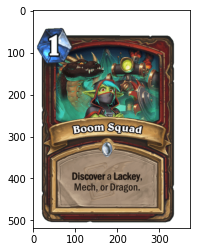

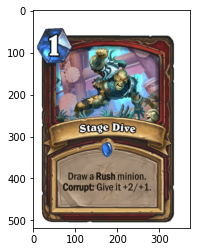

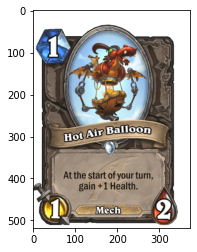

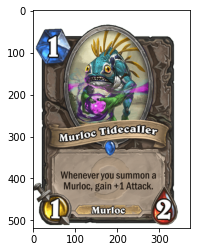

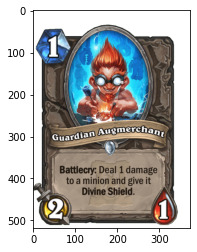

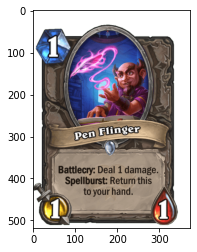

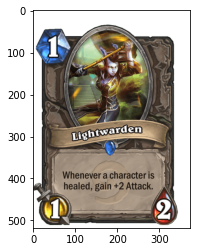

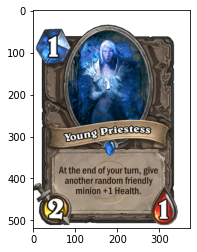

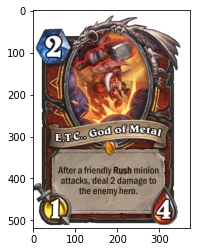

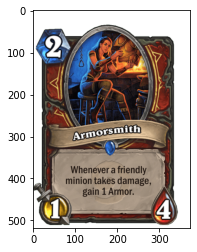

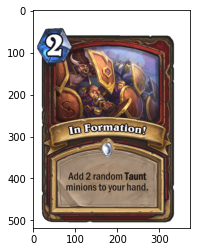

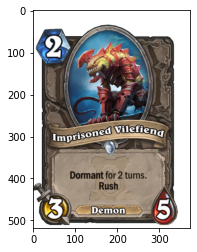

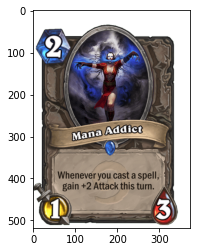

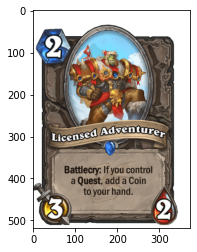

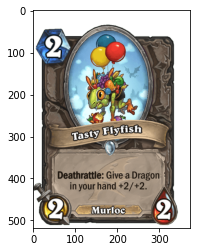

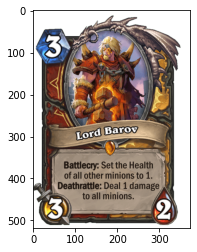

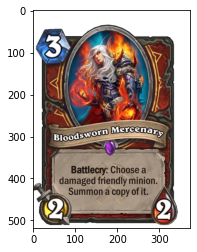

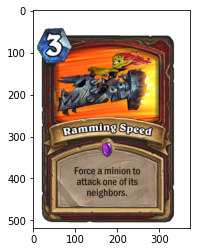

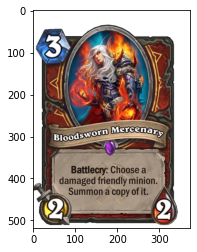

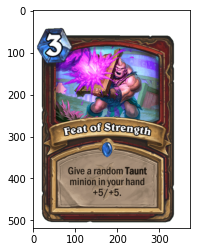

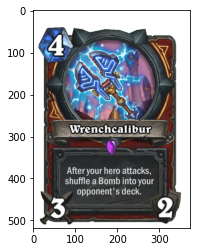

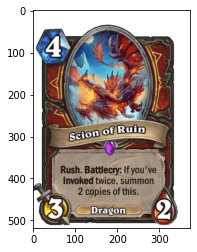

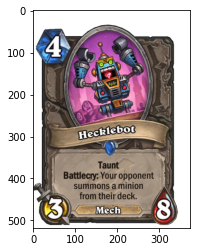

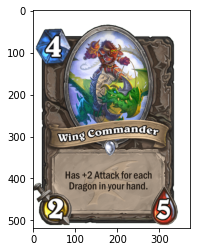

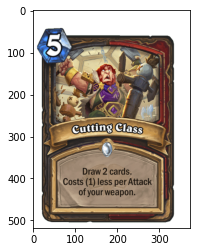

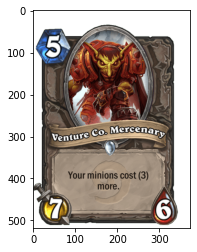

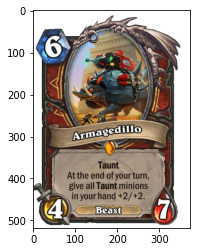

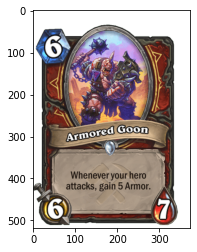

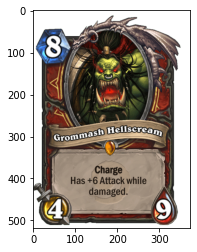

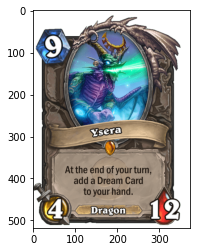

In [195]:
from PIL import Image
import requests
from io import BytesIO

show_decks = [int(a) for a in final_decks[1]]
readable = vector_to_deck(show_decks, new_cards)
readable = groupby_cost(readable)

print("Neutral Card % in new_cards: ", (len(sort_by_class('Neutral',new_cards))/len(new_cards)))
print("Neutral Card % in created_deck: ", (len(sort_by_class('Neutral',readable))/len(readable)))

for card in readable:
    response = requests.get(card['img'])
    img = Image.open(BytesIO(response.content)) 
    plt.figure()
    plt.imshow(img)
    plt.show()

In [167]:
new_cards[181]

#write function to correct card impurities, e.g index 181 that is classed as Neutral even though it's a multiclass Mage/Shaman

{'cardId': 'YOP_021',
 'dbfId': '61959',
 'name': 'Imprisoned Phoenix',
 'cardSet': 'Madness At The Darkmoon Faire',
 'type': 'Minion',
 'rarity': 'Common',
 'cost': 2,
 'attack': 2,
 'health': 3,
 'text': '<b>Dormant</b> for 2 turns.\\n<b>Spell Damage +2</b>',
 'flavor': "It's actually pretty easy to escape chains when you can burst into flames.",
 'artist': 'Konstantin Turovec',
 'collectible': True,
 'race': 'Elemental',
 'playerClass': 'Neutral',
 'multiClassGroup': 'Mage Shaman',
 'classes': ['Mage', 'Shaman'],
 'img': 'https://d15f34w2p8l1cc.cloudfront.net/hearthstone/a1ee0276ccd30456b58fd755ca9a6eac040eed3cf4c096a6772f95a9056c9ec1.png',
 'locale': 'enUS',
 'mechanics': [{'name': 'Spell Damage'}],
 'id': 181}

Enter which class you want to make a deck forWarrior


'Warrior'